<a href="https://www.kaggle.com/code/abdalrhamnhebishy/living-index-cost-analysis?scriptVersionId=191782704" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #5050dc ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## About the Dataset  :

* this Dataset Download from Kaggle .  

* Cost of Living Index by Country, 2024 Mid Year data

* Data scraped from Numbeo: www.numbeo.com/cost-of-living/rankings_by_country.jsp

* All credits to Numbeo: www.numbeo.com/cost-of-living/

* An index of 100 reflects the same living cost as in New York City, United States.

* As of 2024 Mid Year data, in NYC,

* A family of four estimated monthly costs are $6,074.40 without rent.

* A single person's estimated monthly costs are $1,640.90 without rent.


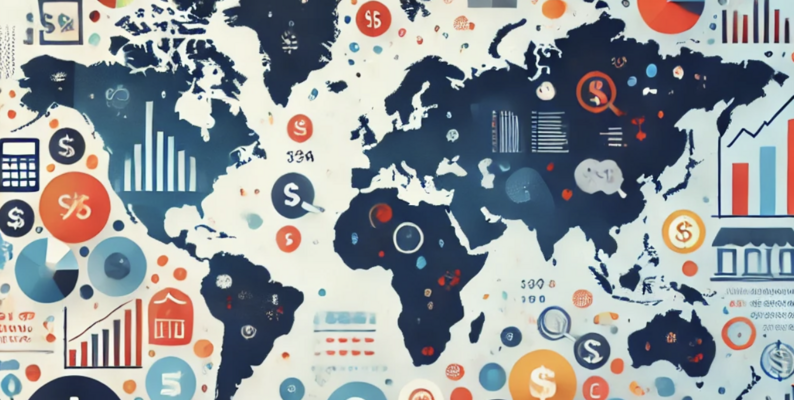

In [2]:
# image :
from IPython.display import display ,Image
img1=Image("cost.png")
display(img1)

## understanding the problem & Target :

  * problem : this problem consider as Analysis problem

  
  * Solving Techniques : By using ordinary Statistical pkgs

     
  
  * we will Make Some Analysis by using both pandas and sql , DataExplantory , Data cleaning , data processing ,

     data visualization , split and preparing data to bulding models .

 ## pandas Analysis :


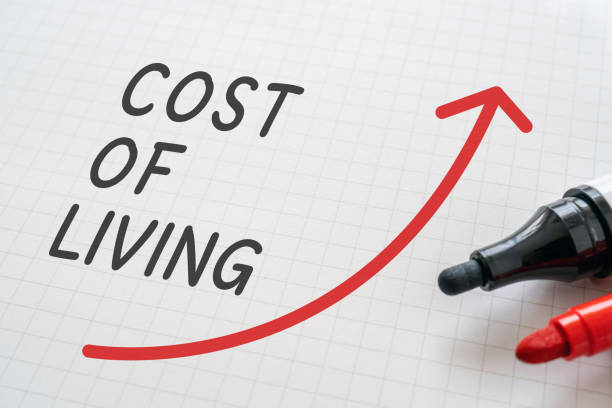

In [3]:
# image1:
from IPython.display import display ,Image
img2=Image("cost1.jpg")
display(img2)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.impute import SimpleImputer
import sqlite3
import re
from IPython.display import display ,Image
from plotly.graph_objs import *
import plotly.express as px 

In [5]:
# load the data :

data=pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")
data.head(15)

Rank            Country  Cost of Living Index  Rent Index  \
0      1        Switzerland                 101.1        46.5   
1      2            Bahamas                  85.0        36.7   
2      3            Iceland                  83.0        39.2   
3      4          Singapore                  76.7        67.2   
4      5           Barbados                  76.6        19.0   
5      6             Norway                  76.0        26.2   
6      7            Denmark                  72.3        26.4   
7      8  Hong Kong (China)                  70.8        59.4   
8      9      United States                  70.4        41.7   
9     10          Australia                  70.2        33.4   
10    11            Austria                  65.1        22.5   
11    12             Canada                  64.8        33.2   
12    13        New Zealand                  64.6        25.9   
13    14            Ireland                  64.4        42.3   
14    15             France                  63.7        21.0   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             74.9            109.1                    97.0   
1                             61.8             81.6                    83.3   
2                             62.0             88.4                    86.8   
3                             72.1             74.6                    50.4   
4                             48.9             80.8                    69.4   
5                             52.1             79.0                    73.5   
6                             50.2             64.8                    81.3   
7                             65.3             84.6                    46.2   
8                             56.6             75.0                    67.2   
9                             52.5             77.3                    62.5   
10                            44.7             66.4                    59.3   
11                            49.6             71.2                    61.7   
12                            46.0             71.9                    57.1   
13                            53.8             59.3                    65.3   
14                            43.2             69.5                    56.3   

    Local Purchasing Power Index  
0                          158.7  
1                           54.6  
2                          120.3  
3                          111.1  
4                           43.5  
5                          114.7  
6                          127.2  
7                          109.3  
8                          142.3  
9                          127.4  
10                         102.4  
11                         103.7  
12                         121.0  
13                         101.1  
14                         102.4

In [6]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 121 entries, 0 to 120

Data columns (total 8 columns):

 #   Column                          Non-Null Count  Dtype  

---  ------                          --------------  -----  

 0   Rank                            121 non-null    int64  

 1   Country                         121 non-null    object 

 2   Cost of Living Index            121 non-null    float64

 3   Rent Index                      121 non-null    float64

 4   Cost of Living Plus Rent Index  121 non-null    float64

 5   Groceries Index                 121 non-null    float64

 6   Restaurant Price Index          121 non-null    float64

 7   Local Purchasing Power Index    121 non-null    float64

dtypes: float64(6), int64(1), object(1)

memory usage: 7.7+ KB

None

-------------------------

shape of the dataset -->> (121, 8)


In [7]:
#get the statistical:
data.describe().T

count       mean        std   min   25%   50%  \
Rank                            121.0  61.000000  35.073732   1.0  31.0  61.0   
Cost of Living Index            121.0  43.555372  16.147574  18.8  30.2  39.5   
Rent Index                      121.0  16.052893  11.412267   2.4   8.5  12.4   
Cost of Living Plus Rent Index  121.0  30.357851  13.263721  11.1  19.8  27.0   
Groceries Index                 121.0  44.228926  17.055109  17.5  31.6  40.5   
Restaurant Price Index          121.0  36.471074  18.258110  12.8  21.6  33.1   
Local Purchasing Power Index    121.0  65.094215  39.569094   2.3  34.8  50.6   

                                 75%    max  
Rank                            91.0  121.0  
Cost of Living Index            52.8  101.1  
Rent Index                      20.1   67.2  
Cost of Living Plus Rent Index  37.0   74.9  
Groceries Index                 53.7  109.1  
Restaurant Price Index          47.2   97.0  
Local Purchasing Power Index    99.4  182.5

In [8]:
# get Types of data:

data.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [9]:
#check if there null values in data:
data.isna().mean()

Rank                              0.0
Country                           0.0
Cost of Living Index              0.0
Rent Index                        0.0
Cost of Living Plus Rent Index    0.0
Groceries Index                   0.0
Restaurant Price Index            0.0
Local Purchasing Power Index      0.0
dtype: float64

In [10]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in Rank -->> 

 Rank

1      1

62     1

90     1

89     1

88     1

      ..

37     1

36     1

35     1

34     1

121    1

Name: count, Length: 121, dtype: int64

-------------------------

counts of items in Country -->> 

 Country

Switzerland    1

Montenegro     1

Ghana          1

Russia         1

Philippines    1

              ..

Qatar          1

Estonia        1

Greece         1

Bahrain        1

Pakistan       1

Name: count, Length: 121, dtype: int64

-------------------------

counts of items in Cost of Living Index -->> 

 Cost of Living Index

26.4    3

31.0    2

46.7    2

31.7    2

27.6    2

       ..

52.6    1

52.8    1

53.9    1

54.1    1

18.8    1

Name: count, Length: 107, dtype: int64

-------------------------

counts of items in Rent Index -->> 

 Rent Index

7.7     4

11.2    3

10.0    3

7.6     3

10.6    2

       ..

16.7    1

24.2    1

14.1    1

24.8    1

2.8     1

Name: count, Length: 99, dtype: int64

--------

In [11]:
# clean the columns of the dataset from precentage sign % or _ if found  :
# Remove special characters from column names

data.columns = data.columns.str.replace('[^A-Za-z0-9]+', '_', regex=True).str.lower() # this mean that will Remove all characters except the characters and Numbers :
data

rank      country  cost_of_living_index  rent_index  \
0       1  Switzerland                 101.1        46.5   
1       2      Bahamas                  85.0        36.7   
2       3      Iceland                  83.0        39.2   
3       4    Singapore                  76.7        67.2   
4       5     Barbados                  76.6        19.0   
..    ...          ...                   ...         ...   
116   117   Bangladesh                  22.5         2.4   
117   118        India                  21.2         5.6   
118   119        Egypt                  21.0         3.7   
119   120        Libya                  20.4         4.3   
120   121     Pakistan                  18.8         2.8   

     cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                              74.9            109.1                    97.0   
1                              61.8             81.6                    83.3   
2                              62.0             88.4                    86.8   
3                              72.1             74.6                    50.4   
4                              48.9             80.8                    69.4   
..                              ...              ...                     ...   
116                            12.8             25.7                    12.8   
117                            13.7             23.8                    15.1   
118                            12.7             21.2                    16.2   
119                            12.7             22.2                    15.2   
120                            11.1             17.5                    12.9   

     local_purchasing_power_index  
0                           158.7  
1                            54.6  
2                           120.3  
3                           111.1  
4                            43.5  
..                            ...  
116                          33.1  
117                          82.6  
118                          20.0  
119                          42.0  
120                          29.1  

[121 rows x 8 columns]

In [12]:
# cleaning categorical features from the null values if found   :
for col in data.select_dtypes("object").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

rank      country  cost_of_living_index  rent_index  \
0       1  Switzerland                 101.1        46.5   
1       2      Bahamas                  85.0        36.7   
2       3      Iceland                  83.0        39.2   
3       4    Singapore                  76.7        67.2   
4       5     Barbados                  76.6        19.0   
..    ...          ...                   ...         ...   
116   117   Bangladesh                  22.5         2.4   
117   118        India                  21.2         5.6   
118   119        Egypt                  21.0         3.7   
119   120        Libya                  20.4         4.3   
120   121     Pakistan                  18.8         2.8   

     cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                              74.9            109.1                    97.0   
1                              61.8             81.6                    83.3   
2                              62.0             88.4                    86.8   
3                              72.1             74.6                    50.4   
4                              48.9             80.8                    69.4   
..                              ...              ...                     ...   
116                            12.8             25.7                    12.8   
117                            13.7             23.8                    15.1   
118                            12.7             21.2                    16.2   
119                            12.7             22.2                    15.2   
120                            11.1             17.5                    12.9   

     local_purchasing_power_index  
0                           158.7  
1                            54.6  
2                           120.3  
3                           111.1  
4                            43.5  
..                            ...  
116                          33.1  
117                          82.6  
118                          20.0  
119                          42.0  
120                          29.1  

[121 rows x 8 columns]

In [13]:
# cleaning Numerical features from the null values if found   :
for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

rank      country  cost_of_living_index  rent_index  \
0      1.0  Switzerland                 101.1        46.5   
1      2.0      Bahamas                  85.0        36.7   
2      3.0      Iceland                  83.0        39.2   
3      4.0    Singapore                  76.7        67.2   
4      5.0     Barbados                  76.6        19.0   
..     ...          ...                   ...         ...   
116  117.0   Bangladesh                  22.5         2.4   
117  118.0        India                  21.2         5.6   
118  119.0        Egypt                  21.0         3.7   
119  120.0        Libya                  20.4         4.3   
120  121.0     Pakistan                  18.8         2.8   

     cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                              74.9            109.1                    97.0   
1                              61.8             81.6                    83.3   
2                              62.0             88.4                    86.8   
3                              72.1             74.6                    50.4   
4                              48.9             80.8                    69.4   
..                              ...              ...                     ...   
116                            12.8             25.7                    12.8   
117                            13.7             23.8                    15.1   
118                            12.7             21.2                    16.2   
119                            12.7             22.2                    15.2   
120                            11.1             17.5                    12.9   

     local_purchasing_power_index  
0                           158.7  
1                            54.6  
2                           120.3  
3                           111.1  
4                            43.5  
..                            ...  
116                          33.1  
117                          82.6  
118                          20.0  
119                          42.0  
120                          29.1  

[121 rows x 8 columns]

In [14]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in rank -->> 

 rank

1.0      1

62.0     1

90.0     1

89.0     1

88.0     1

        ..

37.0     1

36.0     1

35.0     1

34.0     1

121.0    1

Name: count, Length: 121, dtype: int64

-------------------------

counts of items in country -->> 

 country

Switzerland    1

Montenegro     1

Ghana          1

Russia         1

Philippines    1

              ..

Qatar          1

Estonia        1

Greece         1

Bahrain        1

Pakistan       1

Name: count, Length: 121, dtype: int64

-------------------------

counts of items in cost_of_living_index -->> 

 cost_of_living_index

26.4    3

31.0    2

46.7    2

31.7    2

27.6    2

       ..

52.6    1

52.8    1

53.9    1

54.1    1

18.8    1

Name: count, Length: 107, dtype: int64

-------------------------

counts of items in rent_index -->> 

 rent_index

7.7     4

11.2    3

10.0    3

7.6     3

10.6    2

       ..

16.7    1

24.2    1

14.1    1

24.8    1

2.8     1

Name: count, Length: 99, 

In [15]:
# check agin the null values after cleaning the Data :
data.isna().sum()

rank                              0
country                           0
cost_of_living_index              0
rent_index                        0
cost_of_living_plus_rent_index    0
groceries_index                   0
restaurant_price_index            0
local_purchasing_power_index      0
dtype: int64

## Data Explantory by using pandas :

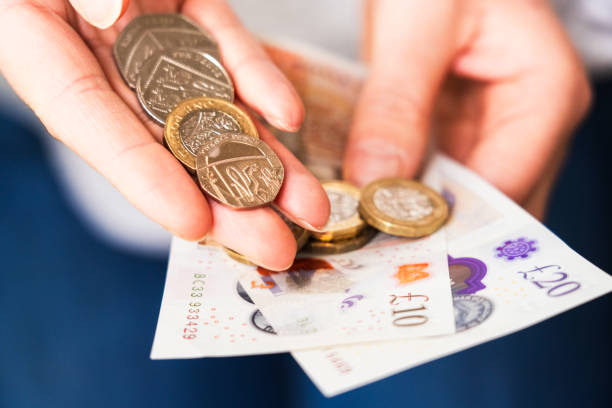

In [16]:
from IPython.display import display ,Image
img3=Image("cost2.jpg")
display(img3)

In [17]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['country'], dtype='object')

 Numerical_columns ----->>> Index(['rank', 'cost_of_living_index', 'rent_index',

       'cost_of_living_plus_rent_index', 'groceries_index',

       'restaurant_price_index', 'local_purchasing_power_index'],

      dtype='object') 

 Discrete_columns ---->>> Index([], dtype='object') 

 Continous_cols ----->> Index(['rank', 'cost_of_living_index', 'rent_index',

       'cost_of_living_plus_rent_index', 'groceries_index',

       'restaurant_price_index', 'local_purchasing_power_index'],

      dtype='object') 

 Nominal Columns --->> Series([], dtype: int64)


In [18]:
# Describe object :
data.describe(include="O").T

count unique          top freq
country   121    121  Switzerland    1

## sql Analysis :

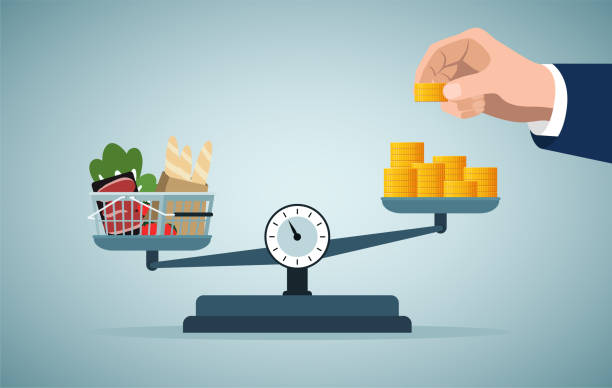

In [19]:
from IPython.display import display ,Image
img4=Image("cost3.jpg")
display(img4)

In [20]:
# Connect to the database
conn = sqlite3.connect('cost.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'Air' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='cost1';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    data.to_sql("cost1", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'cost1' already exists. Skipping table creation.")


The table 'cost1' already exists. Skipping table creation.


In [21]:
df= pd.read_sql("SELECT * FROM cost1", conn)
df

index   rank      country  costoflivingindex  rentindex  \
0        0    1.0  Switzerland              101.1       46.5   
1        1    2.0      Bahamas               85.0       36.7   
2        2    3.0      Iceland               83.0       39.2   
3        3    4.0    Singapore               76.7       67.2   
4        4    5.0     Barbados               76.6       19.0   
..     ...    ...          ...                ...        ...   
116    116  117.0   Bangladesh               22.5        2.4   
117    117  118.0        India               21.2        5.6   
118    118  119.0        Egypt               21.0        3.7   
119    119  120.0        Libya               20.4        4.3   
120    120  121.0     Pakistan               18.8        2.8   

     costoflivingplusrentindex  groceriesindex  restaurantpriceindex  \
0                         74.9           109.1                  97.0   
1                         61.8            81.6                  83.3   
2                         62.0            88.4                  86.8   
3                         72.1            74.6                  50.4   
4                         48.9            80.8                  69.4   
..                         ...             ...                   ...   
116                       12.8            25.7                  12.8   
117                       13.7            23.8                  15.1   
118                       12.7            21.2                  16.2   
119                       12.7            22.2                  15.2   
120                       11.1            17.5                  12.9   

     localpurchasingpowerindex  
0                        158.7  
1                         54.6  
2                        120.3  
3                        111.1  
4                         43.5  
..                         ...  
116                       33.1  
117                       82.6  
118                       20.0  
119                       42.0  
120                       29.1  

[121 rows x 9 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 121 entries, 0 to 120

Data columns (total 9 columns):

 #   Column                     Non-Null Count  Dtype  

---  ------                     --------------  -----  

 0   index                      121 non-null    int64  

 1   rank                       121 non-null    float64

 2   country                    121 non-null    object 

 3   costoflivingindex          121 non-null    float64

 4   rentindex                  121 non-null    float64

 5   costoflivingplusrentindex  121 non-null    float64

 6   groceriesindex             121 non-null    float64

 7   restaurantpriceindex       121 non-null    float64

 8   localpurchasingpowerindex  121 non-null    float64

dtypes: float64(7), int64(1), object(1)

memory usage: 8.6+ KB


In [23]:
df.describe().T

count       mean        std   min   25%   50%  \
index                      121.0  60.000000  35.073732   0.0  30.0  60.0   
rank                       121.0  61.000000  35.073732   1.0  31.0  61.0   
costoflivingindex          121.0  43.555372  16.147574  18.8  30.2  39.5   
rentindex                  121.0  16.052893  11.412267   2.4   8.5  12.4   
costoflivingplusrentindex  121.0  30.357851  13.263721  11.1  19.8  27.0   
groceriesindex             121.0  44.228926  17.055109  17.5  31.6  40.5   
restaurantpriceindex       121.0  36.471074  18.258110  12.8  21.6  33.1   
localpurchasingpowerindex  121.0  65.094215  39.569094   2.3  34.8  50.6   

                            75%    max  
index                      90.0  120.0  
rank                       91.0  121.0  
costoflivingindex          52.8  101.1  
rentindex                  20.1   67.2  
costoflivingplusrentindex  37.0   74.9  
groceriesindex             53.7  109.1  
restaurantpriceindex       47.2   97.0  
localpurchasingpowerindex  99.4  182.5

In [24]:
# check null_values :
df.isna().sum()

index                        0
rank                         0
country                      0
costoflivingindex            0
rentindex                    0
costoflivingplusrentindex    0
groceriesindex               0
restaurantpriceindex         0
localpurchasingpowerindex    0
dtype: int64

In [25]:
# cleaning : index column is not useful for that i will drop it :

df=df.drop(columns="index",axis=1)
df

rank      country  costoflivingindex  rentindex  \
0      1.0  Switzerland              101.1       46.5   
1      2.0      Bahamas               85.0       36.7   
2      3.0      Iceland               83.0       39.2   
3      4.0    Singapore               76.7       67.2   
4      5.0     Barbados               76.6       19.0   
..     ...          ...                ...        ...   
116  117.0   Bangladesh               22.5        2.4   
117  118.0        India               21.2        5.6   
118  119.0        Egypt               21.0        3.7   
119  120.0        Libya               20.4        4.3   
120  121.0     Pakistan               18.8        2.8   

     costoflivingplusrentindex  groceriesindex  restaurantpriceindex  \
0                         74.9           109.1                  97.0   
1                         61.8            81.6                  83.3   
2                         62.0            88.4                  86.8   
3                         72.1            74.6                  50.4   
4                         48.9            80.8                  69.4   
..                         ...             ...                   ...   
116                       12.8            25.7                  12.8   
117                       13.7            23.8                  15.1   
118                       12.7            21.2                  16.2   
119                       12.7            22.2                  15.2   
120                       11.1            17.5                  12.9   

     localpurchasingpowerindex  
0                        158.7  
1                         54.6  
2                        120.3  
3                        111.1  
4                         43.5  
..                         ...  
116                       33.1  
117                       82.6  
118                       20.0  
119                       42.0  
120                       29.1  

[121 rows x 8 columns]

## Data Explantory by using sqlite3:

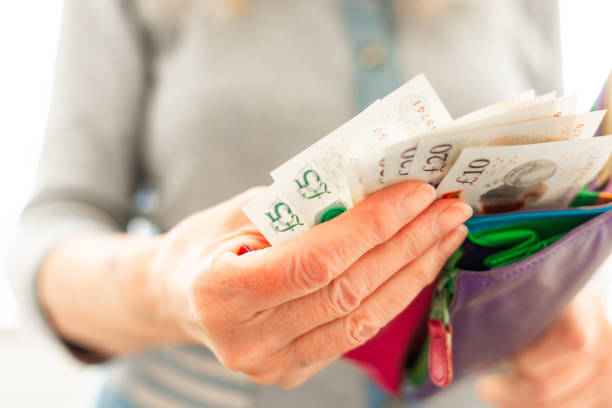

In [26]:
from IPython.display import display ,Image
img5=Image("cost4.jpg")
display(img5)

In [27]:
# Q1 : which countries has the first rank and has the maximum of costoflivingindex  :

R1=cursor.execute("SELECT COUNTRY FROM COST1 WHERE  RANK=1 AND COSTOFLIVINGINDEX=(SELECT MAX(COSTOFLIVINGINDEX) FROM COST1 WHERE RANK=1)")
print("Countries that has first rank with the maximum of cost living  =",R1.fetchall())

# Q2:  which countries has the 121 rank and has the Minimum of costoflivingindex :

R2=cursor.execute("SELECT COUNTRY FROM COST1 WHERE  RANK= 121 AND COSTOFLIVINGINDEX=(SELECT MIN(COSTOFLIVINGINDEX) FROM COST1 WHERE RANK=121)")
print("Countries that has 121 rank with the Minimum of cost living  =",R2.fetchall())

# Q3 : which country has the maximum and minimum of the rentindex :

R3=cursor.execute("SELECT COUNTRY FROM COST1 WHERE RENTINDEX=(SELECT MAX(RENTINDEX) FROM COST1 )")
print("The country that has the highest RENTINDEX  =",R3.fetchall())

R4=cursor.execute("SELECT COUNTRY FROM COST1 WHERE RENTINDEX=(SELECT MIN(RENTINDEX) FROM COST1 )")
print("The country that has the LOWEST RENTINDEX  =",R4.fetchall())



Countries that has first rank with the maximum of cost living  = [('Switzerland',)]

Countries that has 121 rank with the Minimum of cost living  = [('Pakistan',)]

The country that has the highest RENTINDEX  = [('Singapore',)]

The country that has the LOWEST RENTINDEX  = [('Bangladesh',)]


In [28]:
#Q4 :which country the the max of both restaurant_price_index & groceries_index :

R5 = cursor.execute("""
SELECT COUNTRY 
FROM COST1 
WHERE RESTAURANTPRICEINDEX = (SELECT MAX(RESTAURANTPRICEINDEX) FROM COST1) 
AND GROCERIESINDEX = (SELECT MAX(GROCERIESINDEX) FROM COST1)
""")
print("The country that has the highest of restaurant_price_index & groceries_index   =",R5.fetchall())

The country that has the highest of restaurant_price_index & groceries_index   = [('Switzerland',)]


In [29]:
# Q5 : which country has the highest  cost_of_living_plus_rent_index:

R6=cursor.execute("""
SELECT COUNTRY
FROM COST1
WHERE COSTOFLIVINGPLUSRENTINDEX=(SELECT MAX(COSTOFLIVINGPLUSRENTINDEX) FROM COST1)
""")
print("the highest country from cost_of_living_plus_rent_index=",R6.fetchall())

the highest country from cost_of_living_plus_rent_index= [('Switzerland',)]


In [30]:
# Q6 : HOW MANY OF COUNTRIES THAT costoflivingindex smaller than 50 $ ?

R7=cursor.execute("""
SELECT COUNT(COUNTRY)
FROM COST1
WHERE COSTOFLIVINGPLUSRENTINDEX<50
""")
print("Number  OF  Countries costoflivingindex smaller than 50 $ :",R7.fetchall())

Number  OF  Countries costoflivingindex smaller than 50 $ : [(110,)]


## Visualization the Dataset

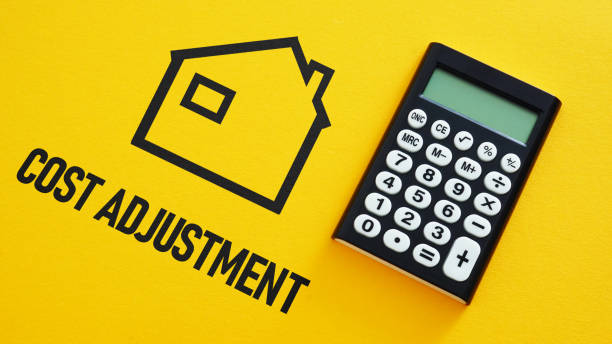

In [31]:
from IPython.display import display ,Image
img5=Image("cost5.jpg")
display(img5)

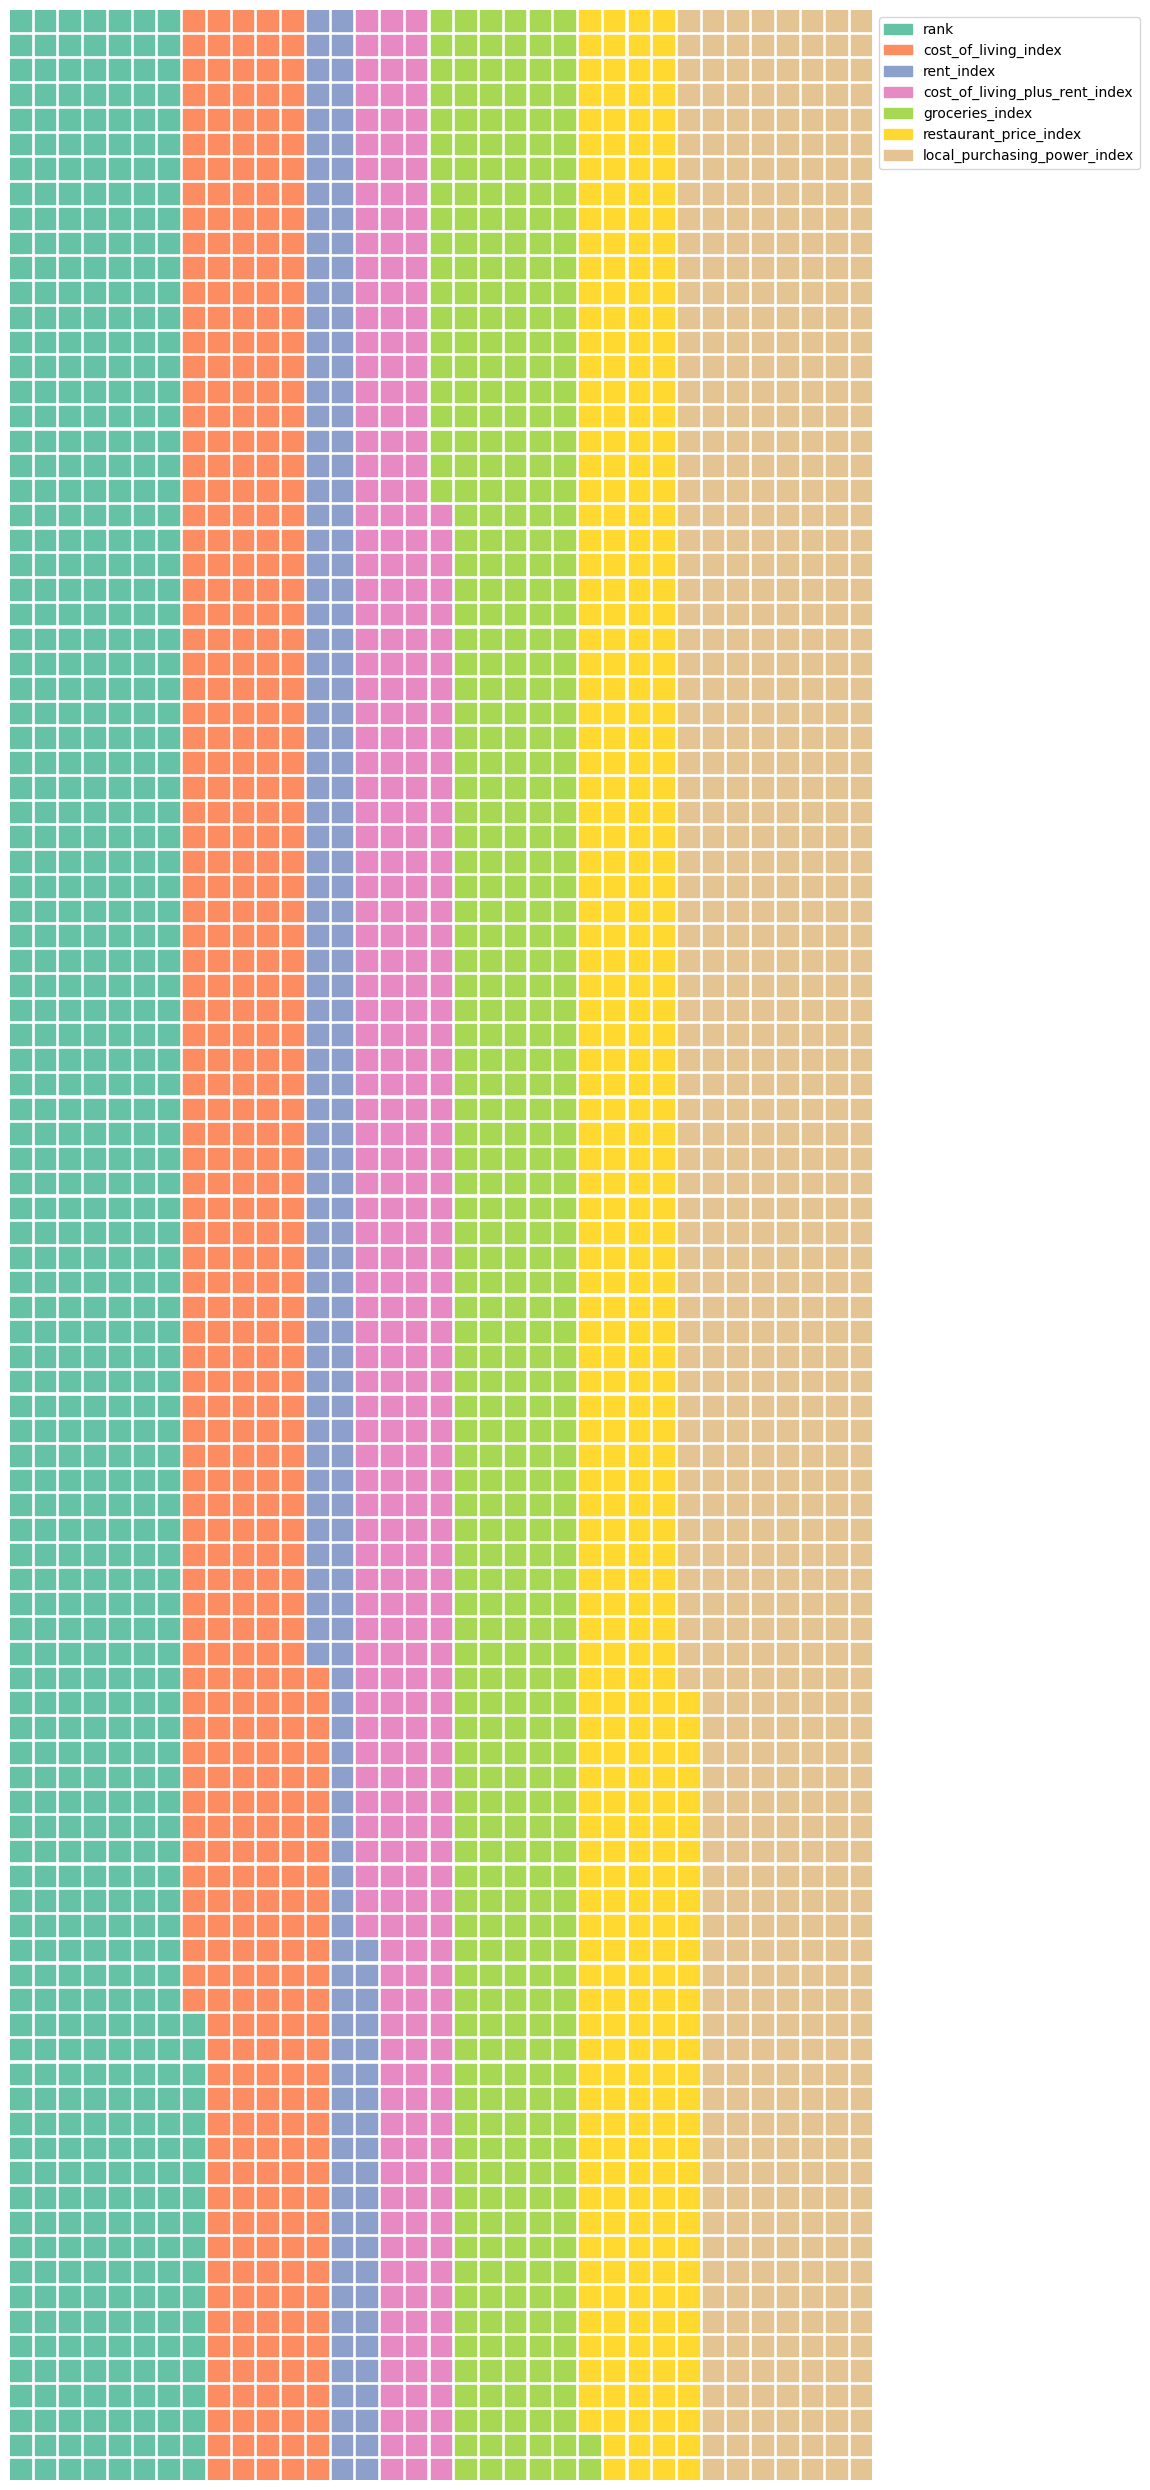

In [32]:
# Make a waffel for the Data:
# from this waffle i see which Feature is a controled on other features : 

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.show()

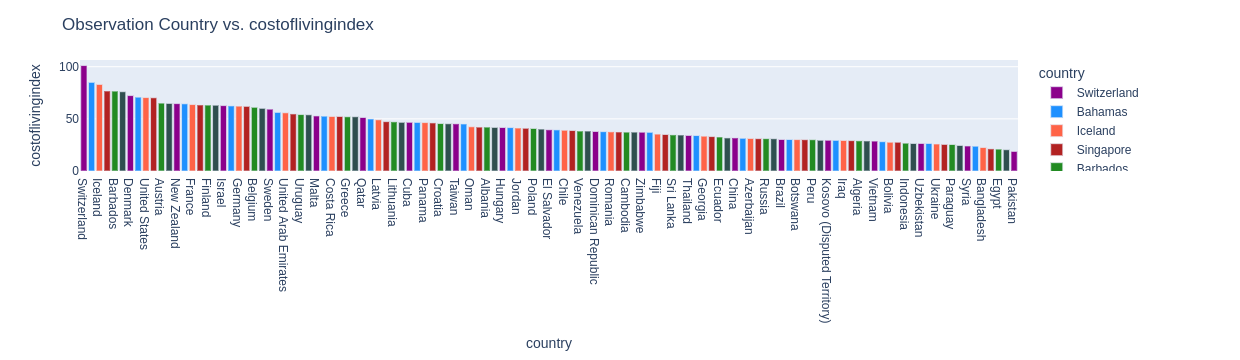

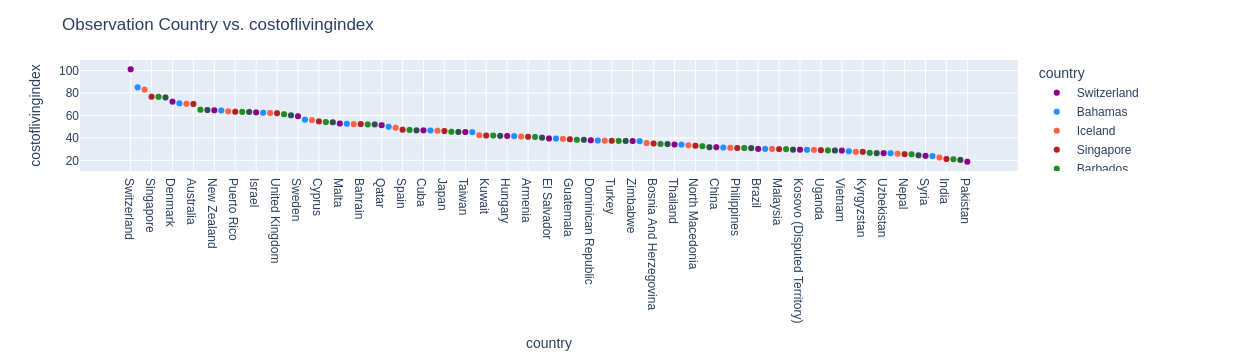

In [33]:
# Observation Country vs. costoflivingindex(barplot):

color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']
fig = px.bar(df, x='country', y='costoflivingindex', color='country', color_discrete_sequence=color_palette)
fig.update_layout(title="Observation Country vs. costoflivingindex", xaxis_title="country", yaxis_title="costoflivingindex")
fig.show()

# Observation Country vs. costoflivingindex(scatterplot):

color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']
fig = px.scatter(df, x='country', y='costoflivingindex', color='country', color_discrete_sequence=color_palette,trendline='ols')
fig.update_layout(title="Observation Country vs. costoflivingindex", xaxis_title="country", yaxis_title="costoflivingindex")
fig.show()





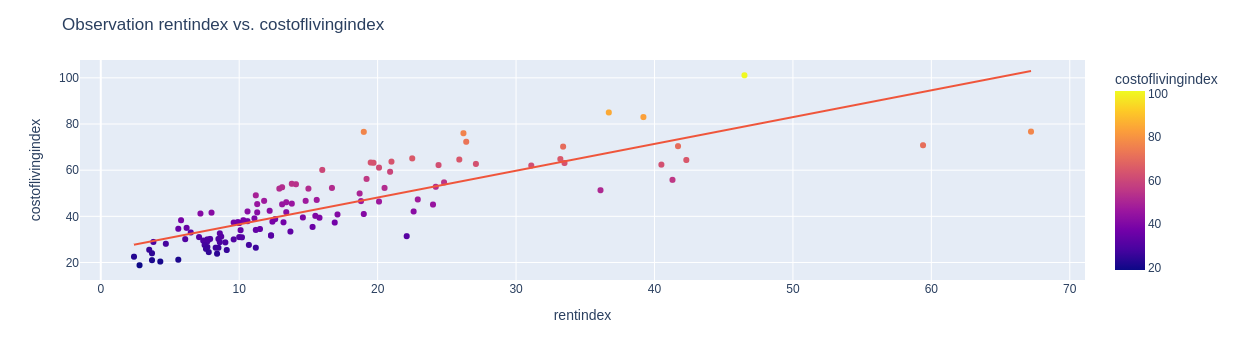

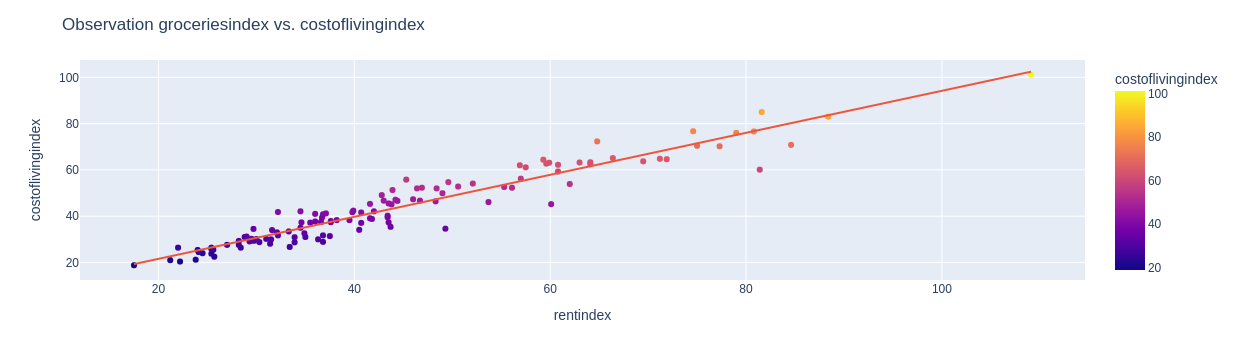

In [34]:
# Observation  rentindex vs. costoflivingindex(scatterplot) positve Relationship :

color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']
fig = px.scatter(df, x='rentindex', y='costoflivingindex', color='costoflivingindex', color_discrete_sequence=color_palette,trendline='ols')
fig.update_layout(title="Observation rentindex vs. costoflivingindex", xaxis_title="rentindex", yaxis_title="costoflivingindex")
fig.show()

# Observation  groceriesindex vs. costoflivingindex(scatterplot) positve Relationship :


fig = px.scatter(df, x='groceriesindex', y='costoflivingindex', color='costoflivingindex', color_discrete_sequence=color_palette,trendline='ols')
fig.update_layout(title="Observation groceriesindex vs. costoflivingindex", xaxis_title="rentindex", yaxis_title="costoflivingindex")
fig.show()



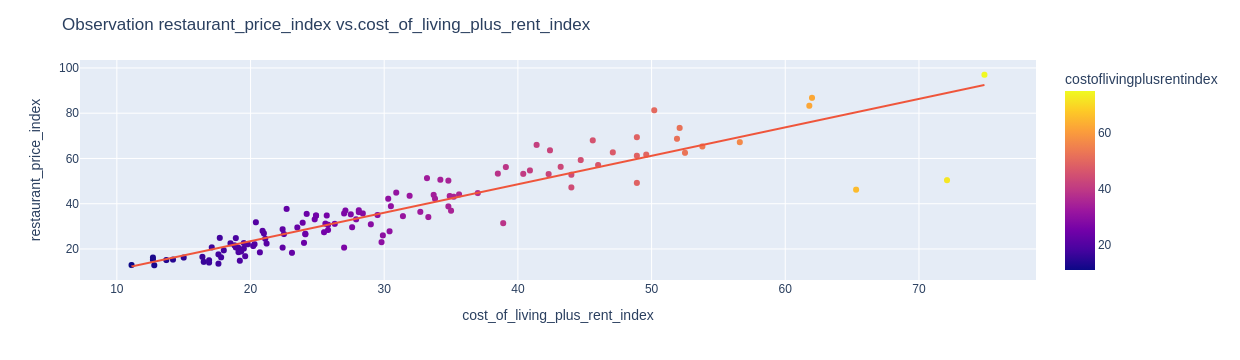

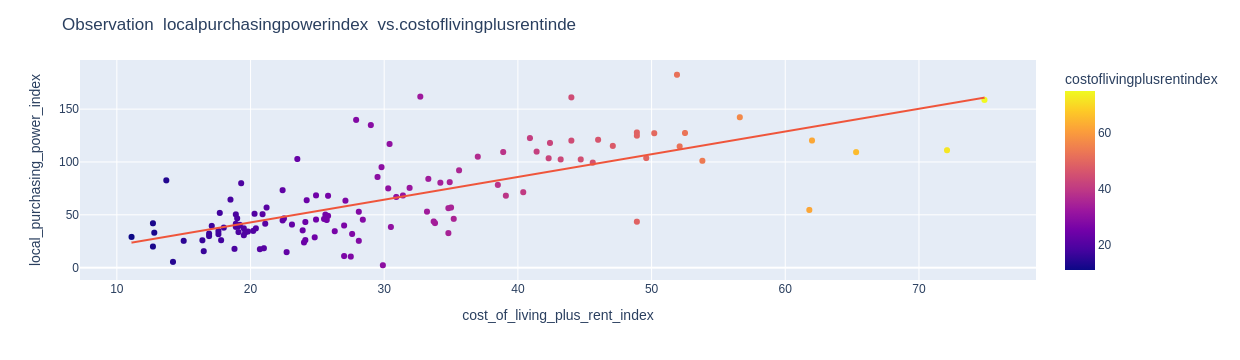

In [35]:
# Observation  restaurantpriceindex  vs.costoflivingplusrentindex (scatterplot) positve Relationship :
fig = px.scatter(df, x='costoflivingplusrentindex', y='restaurantpriceindex', color='costoflivingplusrentindex', color_discrete_sequence=color_palette,trendline='ols')
fig.update_layout(title="Observation restaurant_price_index vs.cost_of_living_plus_rent_index ", xaxis_title="cost_of_living_plus_rent_index", yaxis_title="restaurant_price_index")
fig.show()

# Observation  localpurchasingpowerindex  vs.costoflivingplusrentindex (scatterplot) positve Relationship :
fig = px.scatter(df, x='costoflivingplusrentindex', y='localpurchasingpowerindex', color='costoflivingplusrentindex', color_discrete_sequence=color_palette,trendline='ols')
fig.update_layout(title="Observation  localpurchasingpowerindex  vs.costoflivingplusrentinde ", xaxis_title="cost_of_living_plus_rent_index", yaxis_title="local_purchasing_power_index")
fig.show()






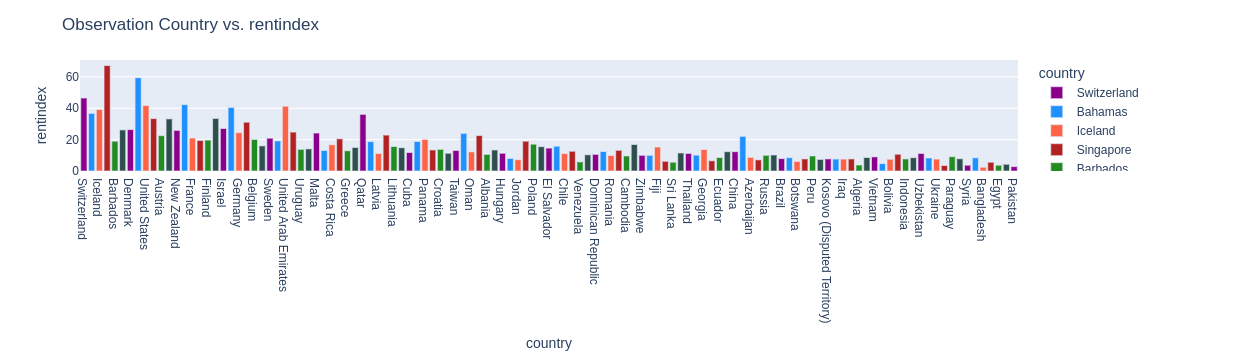

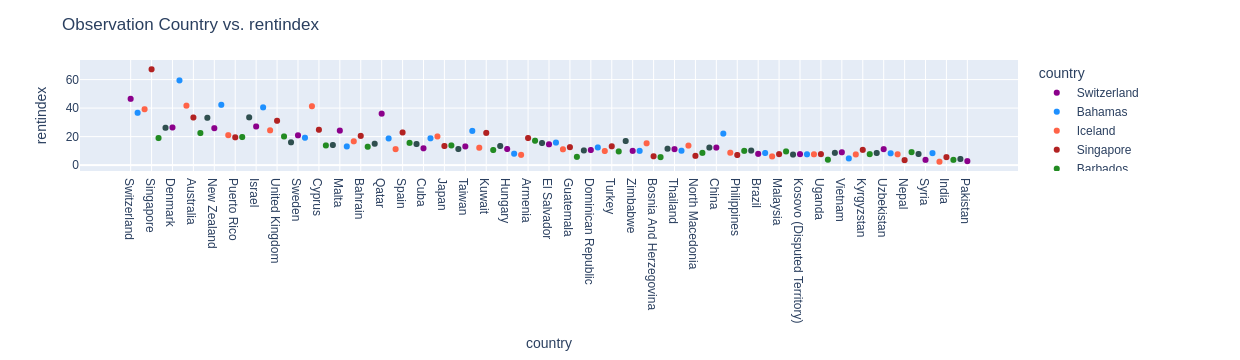

In [36]:
# Observation Country vs.rentindex (barplot) :
color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']
fig = px.bar(df, x='country', y='rentindex', color='country', color_discrete_sequence=color_palette)
fig.update_layout(title="Observation Country vs. rentindex", xaxis_title="country", yaxis_title="rentindex")
fig.show()

# Observation Country vs.rentindex (scatter) :
color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']
fig = px.scatter(df, x='country', y='rentindex', color='country', color_discrete_sequence=color_palette,trendline='rolling')
fig.update_layout(title="Observation Country vs. rentindex", xaxis_title="country", yaxis_title="rentindex")
fig.show()



country

Singapore               67.2

Hong Kong (China)       59.4

Switzerland             46.5

Ireland                 42.3

United States           41.7

United Arab Emirates    41.3

Luxembourg              40.5

Iceland                 39.2

Bahamas                 36.7

Qatar                   36.1

Name: rentindex, dtype: float64


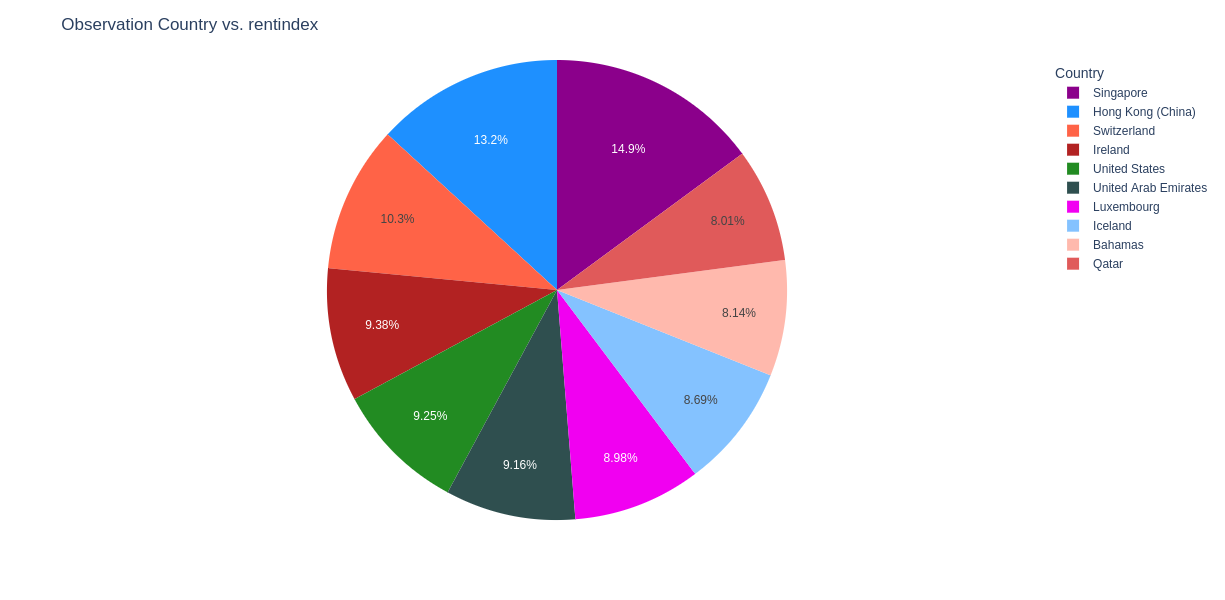

In [37]:
# selected the highest 10 countries from rentindex

top_10 = df.groupby("country")["rentindex"].mean().sort_values(ascending=False).head(10)

# Display the top 10 countries

print(top_10)

top_10_df = top_10.reset_index()
fig = px.pie(top_10_df, names='country', values='rentindex', color_discrete_sequence=color_palette)

fig.update_layout(
    title="Observation Country vs. rentindex",
    legend_title="Country",
    width=800,  
    height=600  
         )
# Show the plot
fig.show()

In [38]:
# Detect the highest 3 Countries from rentindex :
import folium

# Create a map object
map = folium.Map(location=[27.9506,-82.4584], zoom_start=10)

# Define the locations
locations = [
    {"location": [1.3521, 103.8198], "popup": "Singapore (1st)"},
    {"location": [22.3964, 114.1095], "popup": "Hong Kong (China) (2nd)"},
    {"location": [46.9480, 7.4481], "popup": "Switzerland (3rd)"},
        ]
# Add markers to the map
for loc in locations:
    folium.Marker(location=loc["location"], popup=loc["popup"]).add_to(map)

# Display the map
map

/tmp/ipykernel_13447/622547812.py:3: FutureWarning:







Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.






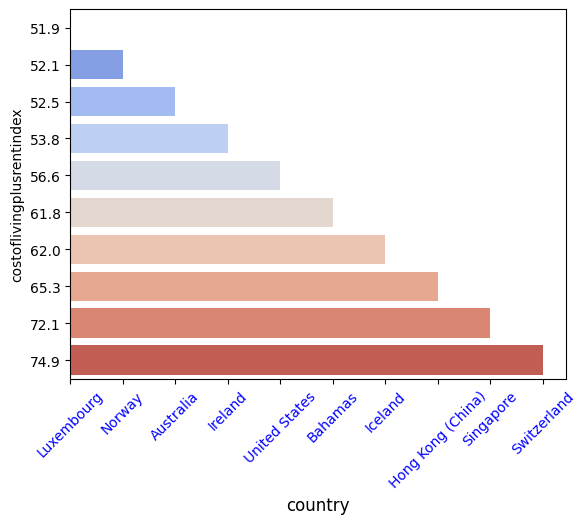

In [39]:
top = df.groupby("country")["costoflivingplusrentindex"].mean().sort_values(ascending=False).head(10)
top_df = top.reset_index()
sns.barplot(x='country', y='costoflivingplusrentindex', data=top_df, color="r", palette='coolwarm', orient='h')
plt.xticks(rotation=45, color="b")
plt.xlabel("country", fontdict={'fontsize': 12})
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


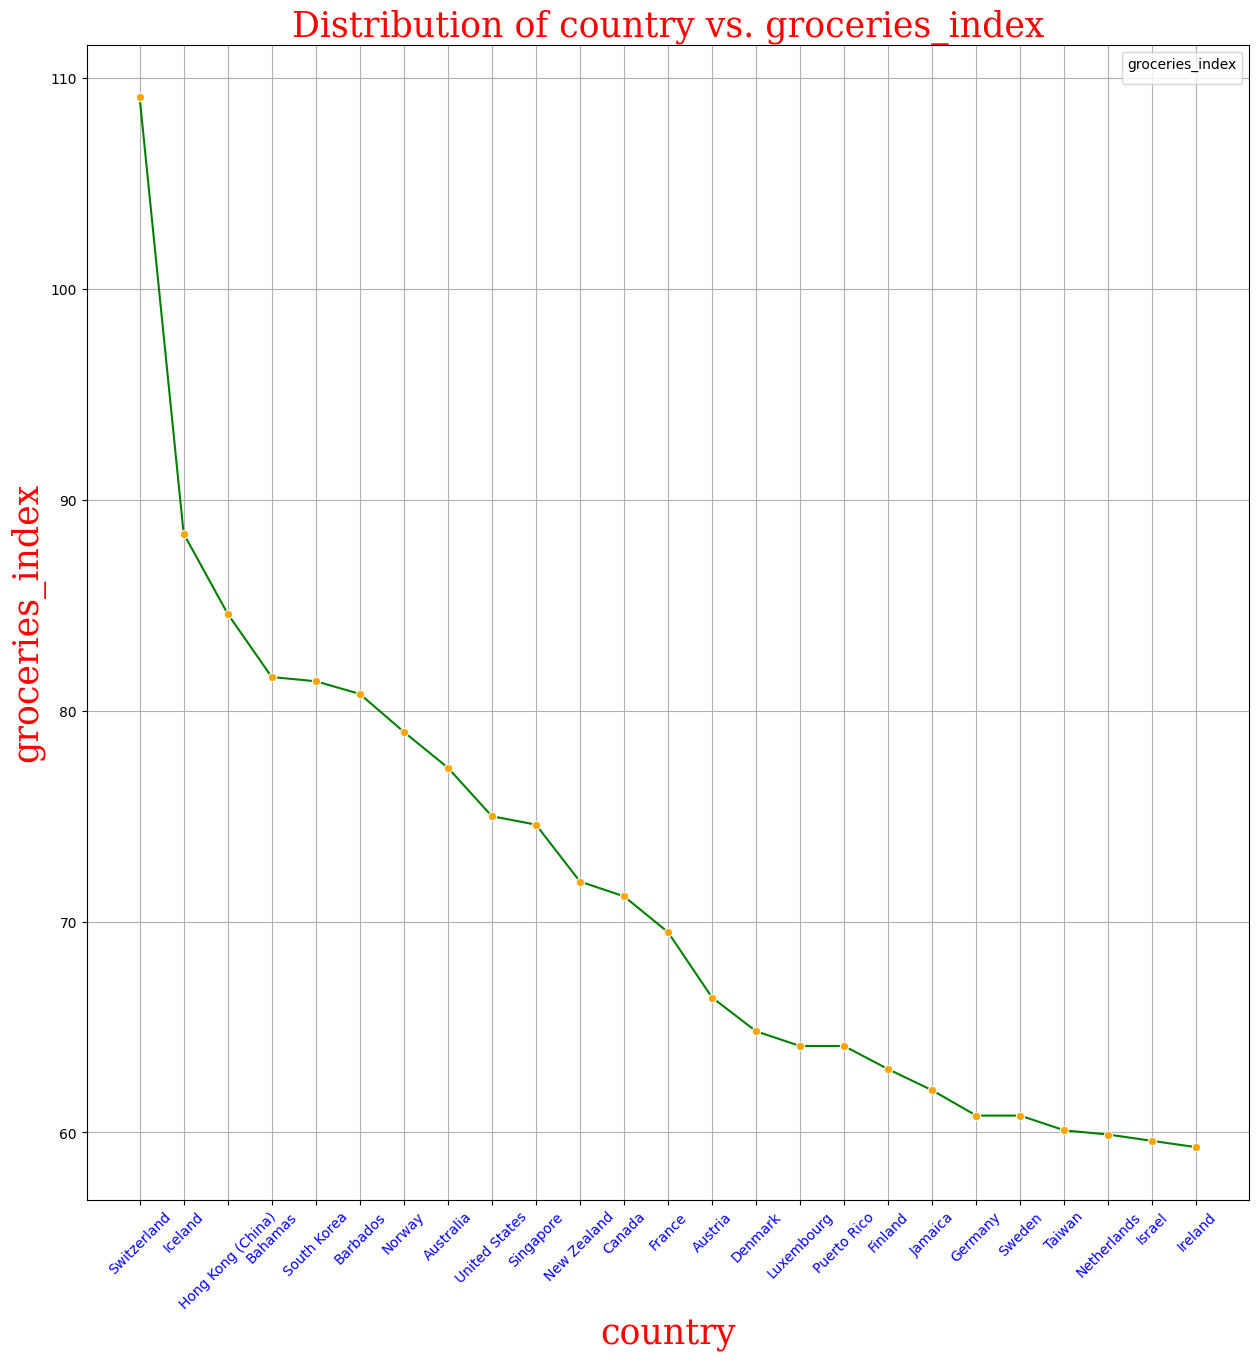

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


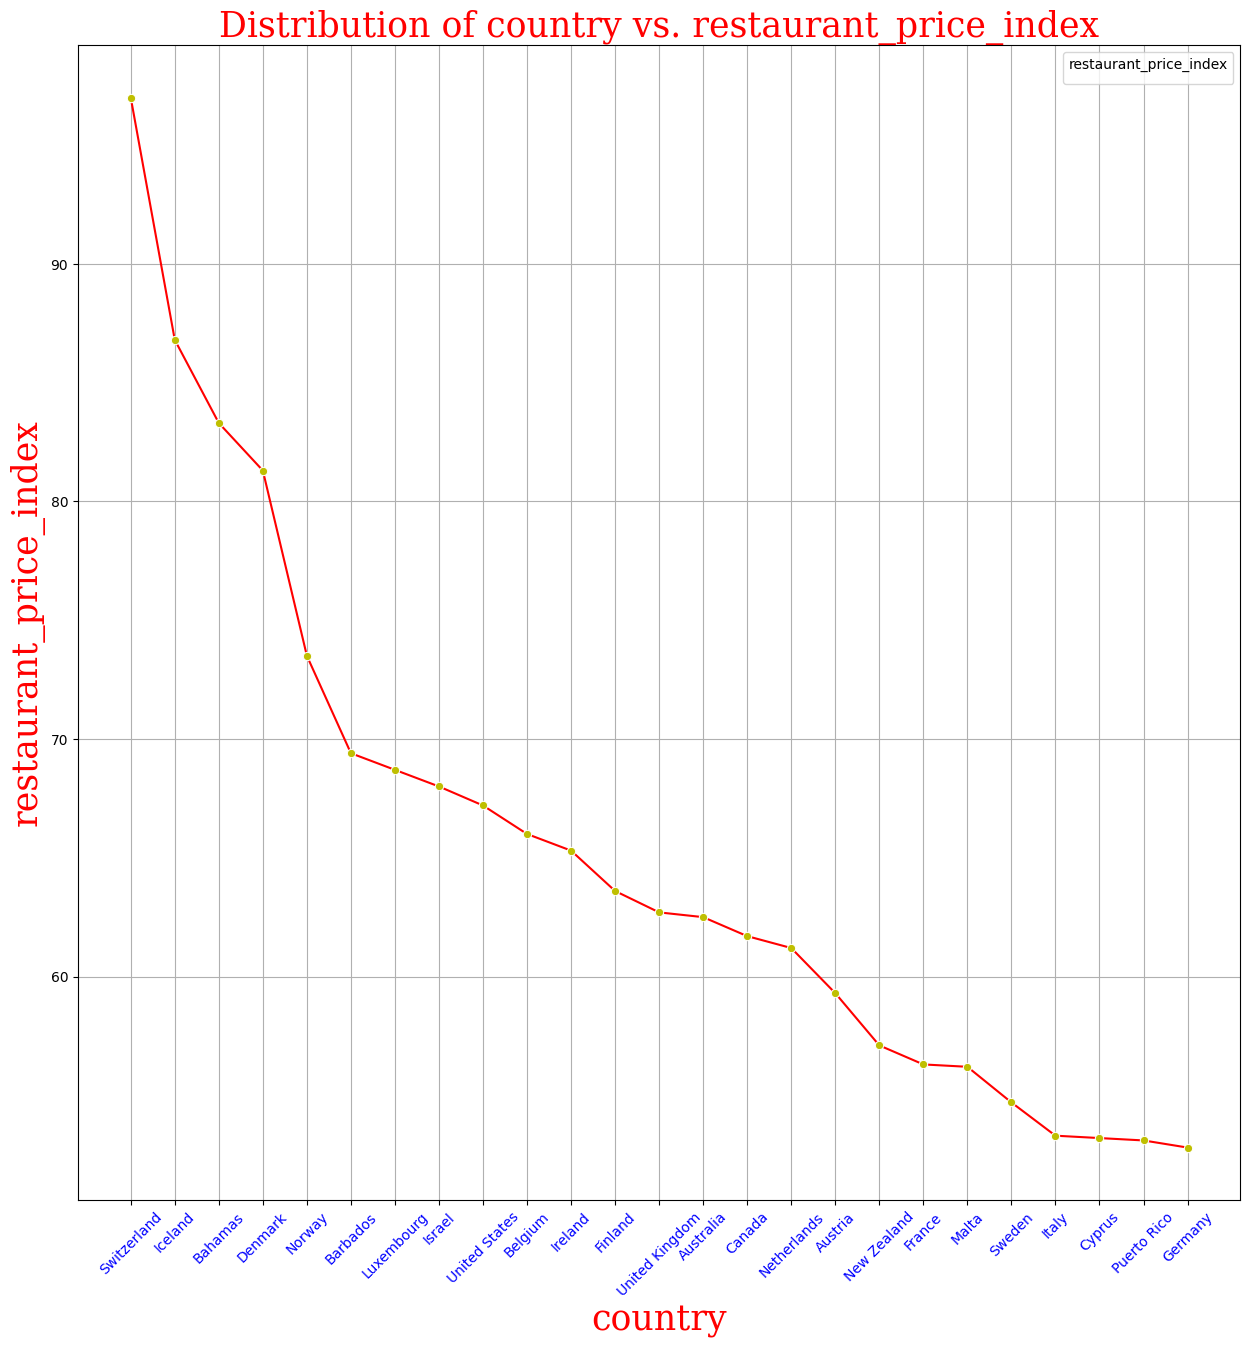

In [40]:
# observe the highest 25 countries from groceries_index:
f1={"family":"serif","size":25,"color":"r"}
plt.figure(figsize=(15,15))
plt.title("Distribution of country vs. groceries_index",fontdict=f1)
top=df.groupby("country")["groceriesindex"].mean().sort_values(ascending=False).head(25)
sns.lineplot(x=top.index,y=top.values,color="g",marker="o",mfc="orange")
plt.xticks(rotation=45,color="b")
plt.xlabel("country",fontdict=f1)
plt.ylabel("groceries_index",fontdict=f1)
plt.legend(title="groceries_index")
plt.grid(True)
plt.show()

# observe the highest 25 countries from restaurantpriceindex :

plt.figure(figsize=(15,15))
plt.title("Distribution of country vs. restaurant_price_index",fontdict=f1)
top=df.groupby("country")["restaurantpriceindex"].mean().sort_values(ascending=False).head(25)
sns.lineplot(x=top.index,y=top.values,color="r",marker="o",mfc="y")
plt.xticks(rotation=45,color="b")
plt.xlabel("country",fontdict=f1)
plt.ylabel("restaurant_price_index",fontdict=f1)
plt.legend(title="restaurant_price_index")
plt.grid(True)
plt.show()


array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'cost_of_living_index'}>,
        <Axes: title={'center': 'rent_index'}>],
       [<Axes: title={'center': 'cost_of_living_plus_rent_index'}>,
        <Axes: title={'center': 'groceries_index'}>,
        <Axes: title={'center': 'restaurant_price_index'}>],
       [<Axes: title={'center': 'local_purchasing_power_index'}>,
        <Axes: >, <Axes: >]], dtype=object)

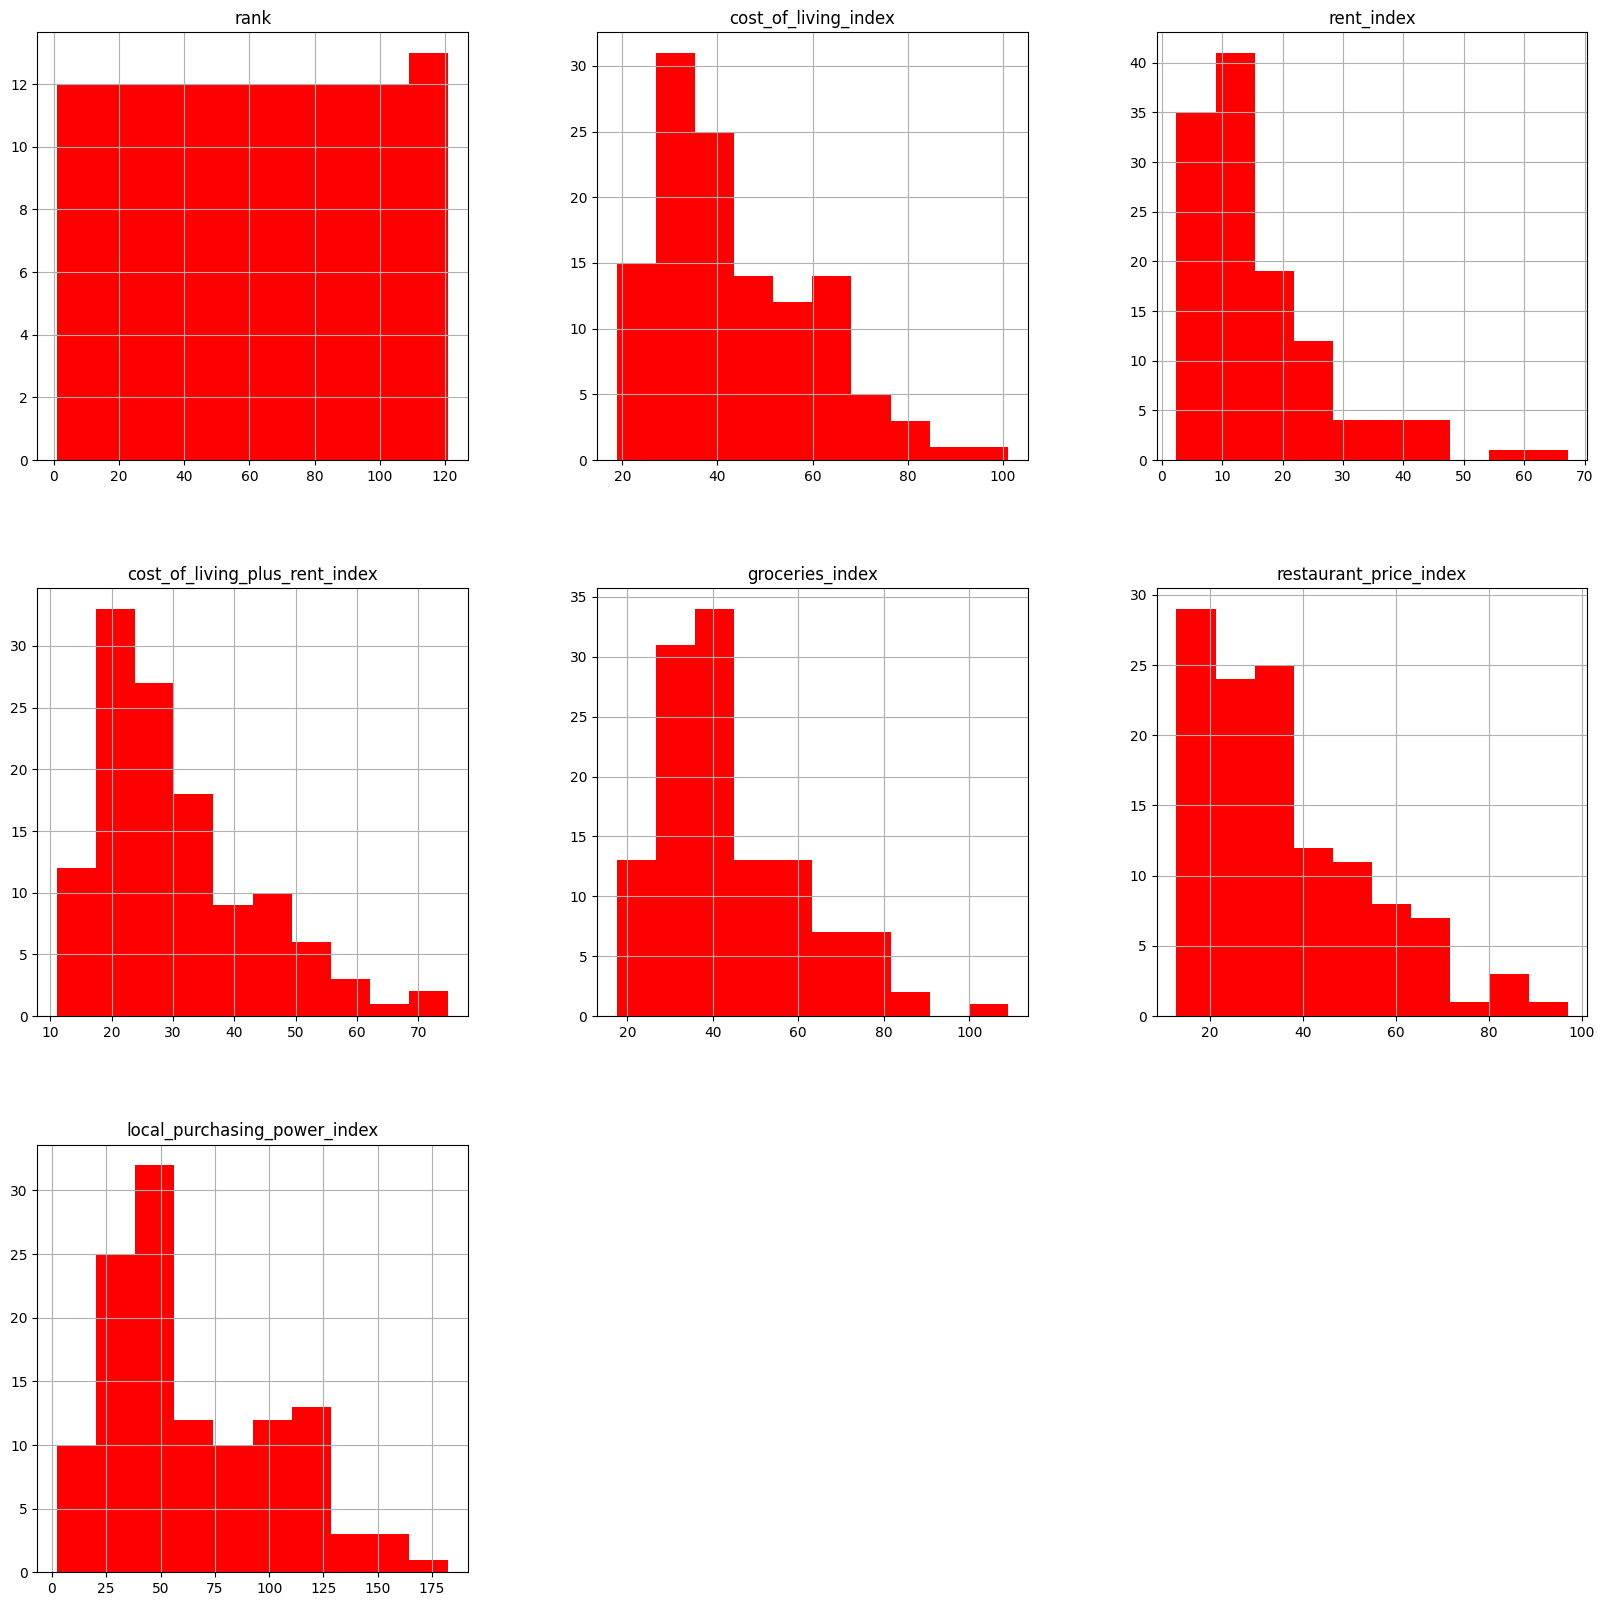

In [41]:
# hist of data:
data.hist(figsize=(20,20),color="r")

<Figure size 30000x30000 with 0 Axes>

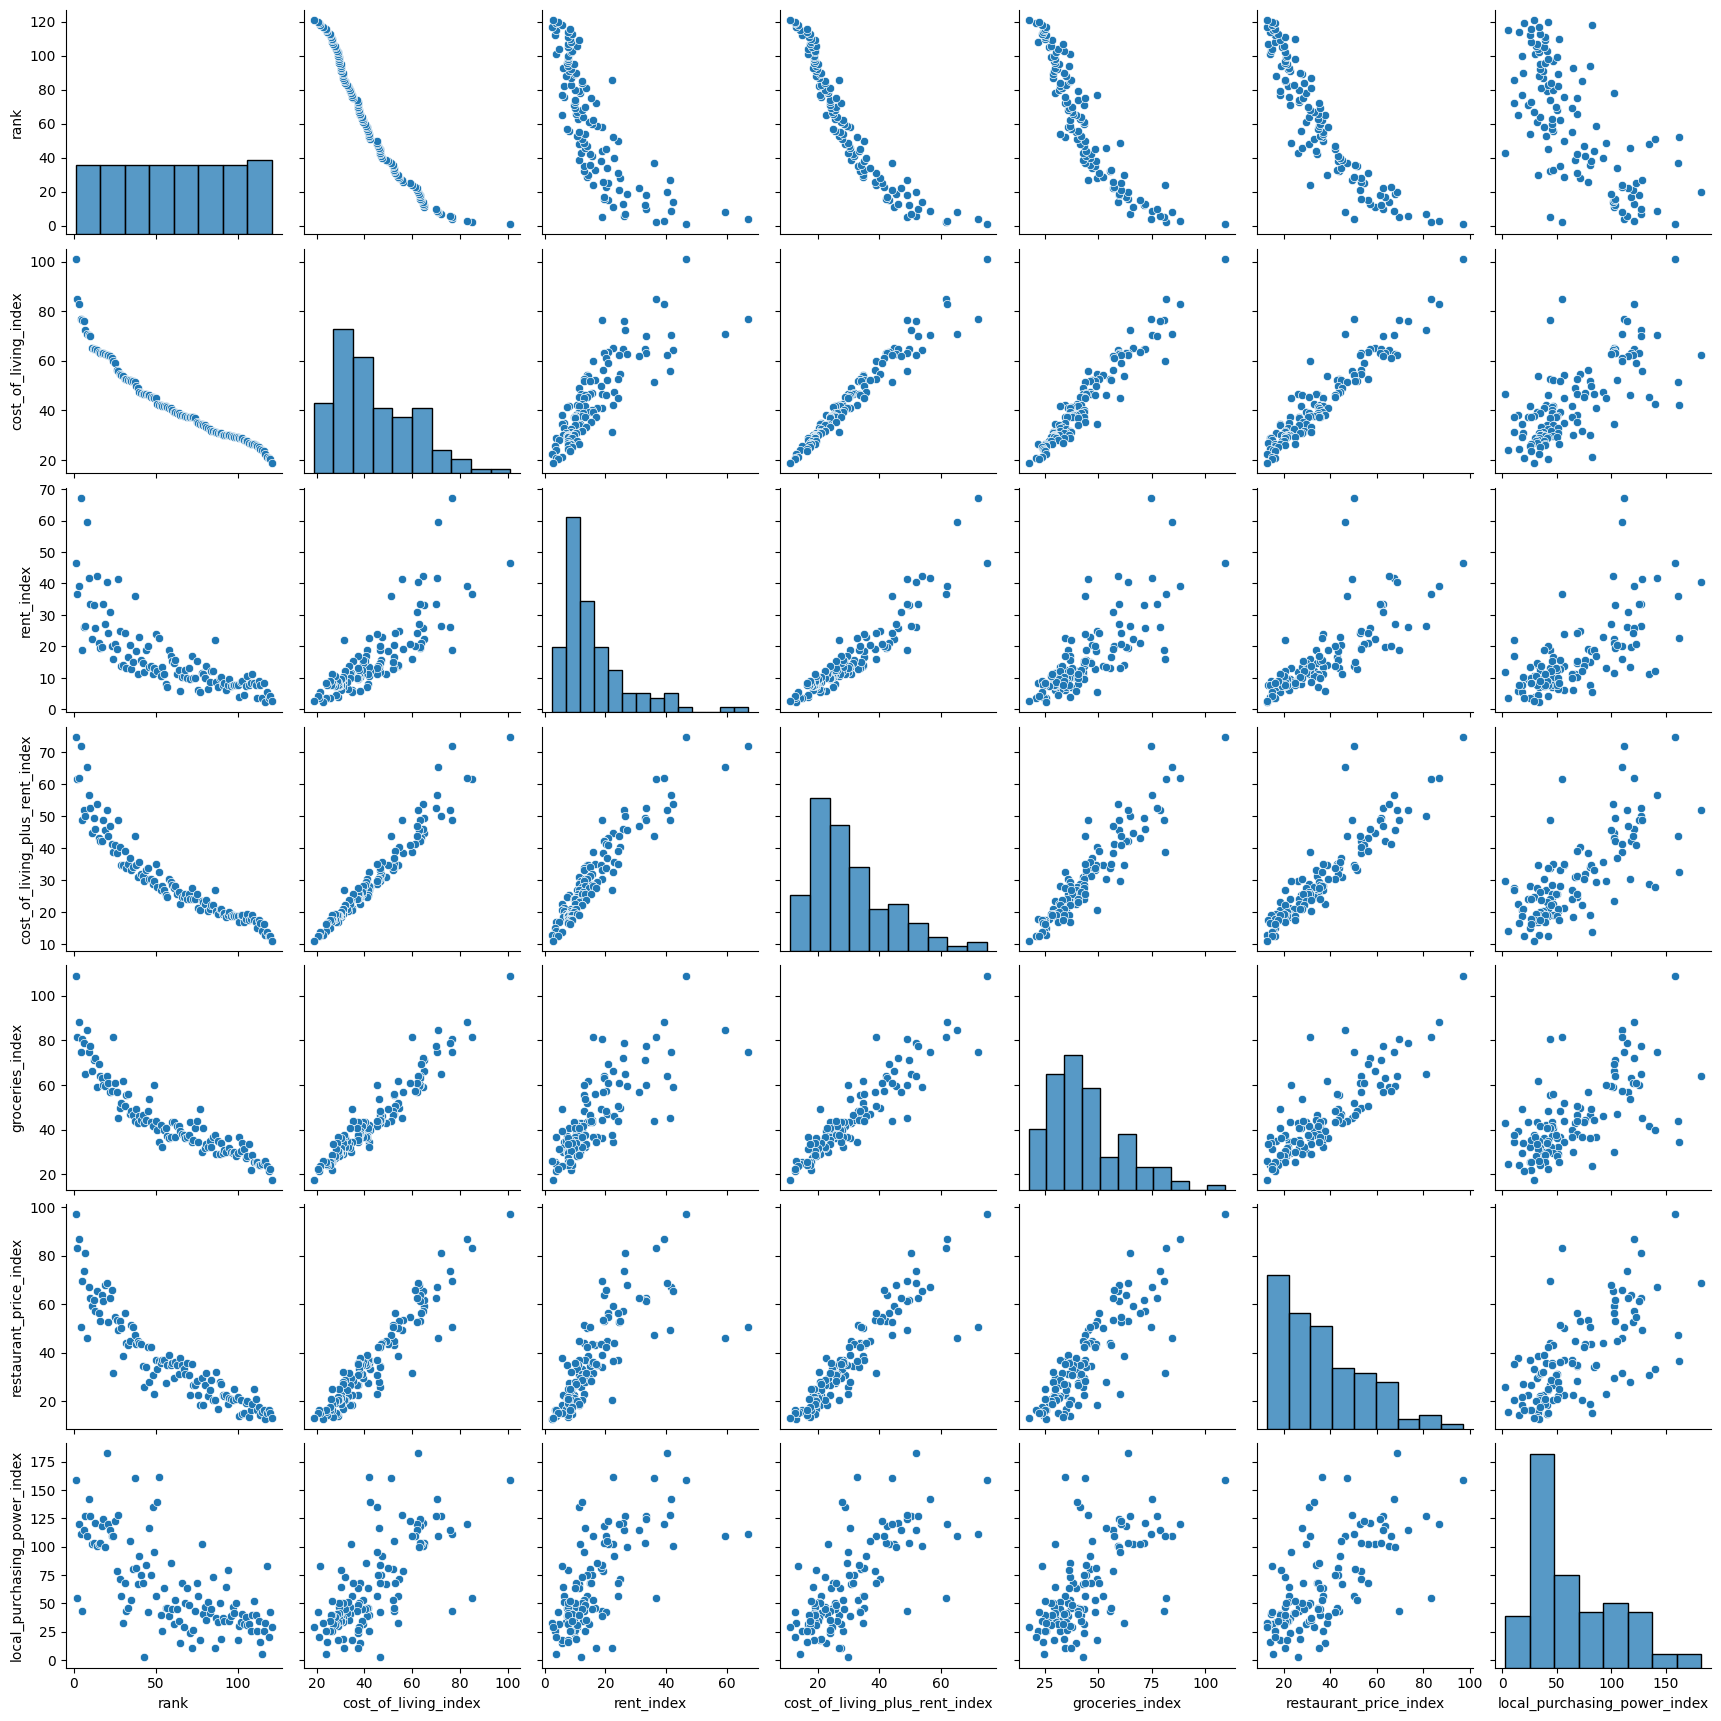

In [42]:
# scatterplots & barplot to cover on the continus_features: 

plt.figure(figsize=(100,100),dpi=300)
sns.pairplot(data.select_dtypes(include="float64"))

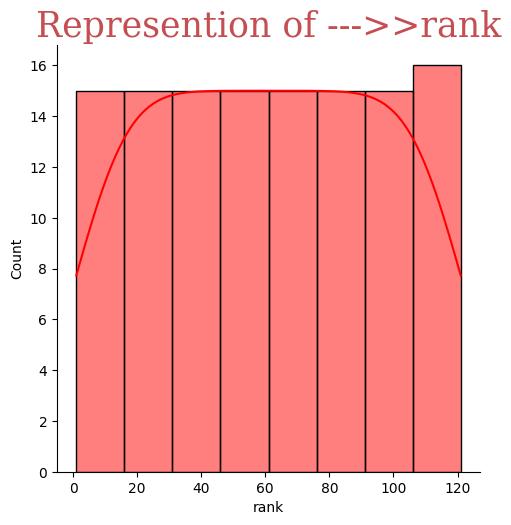

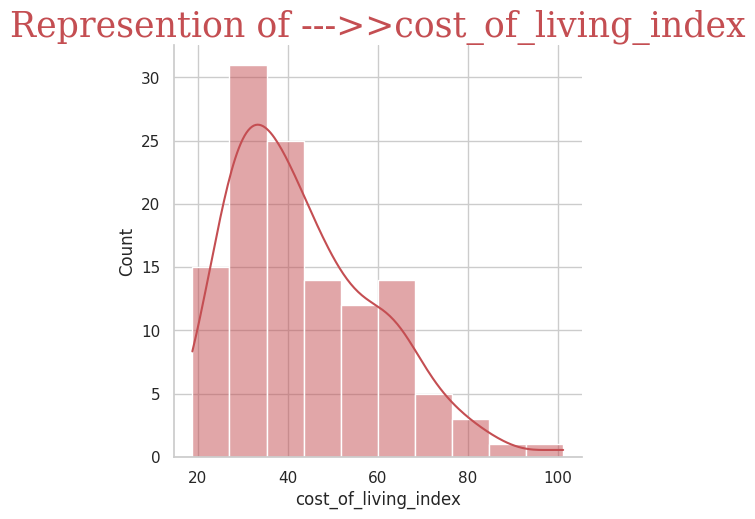

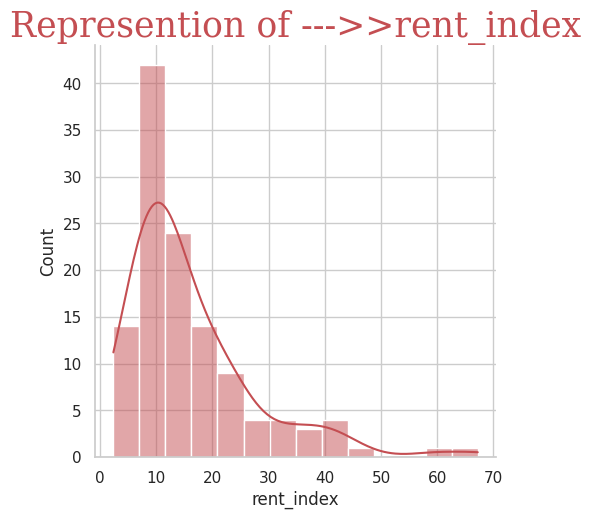

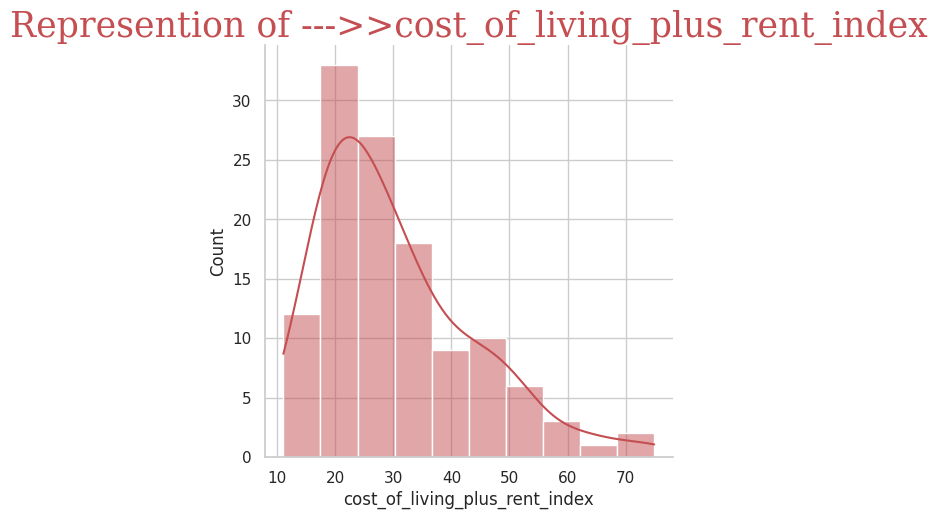

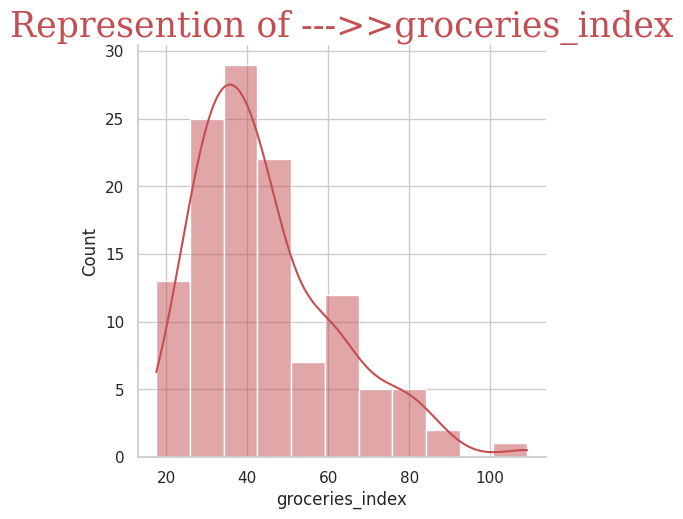

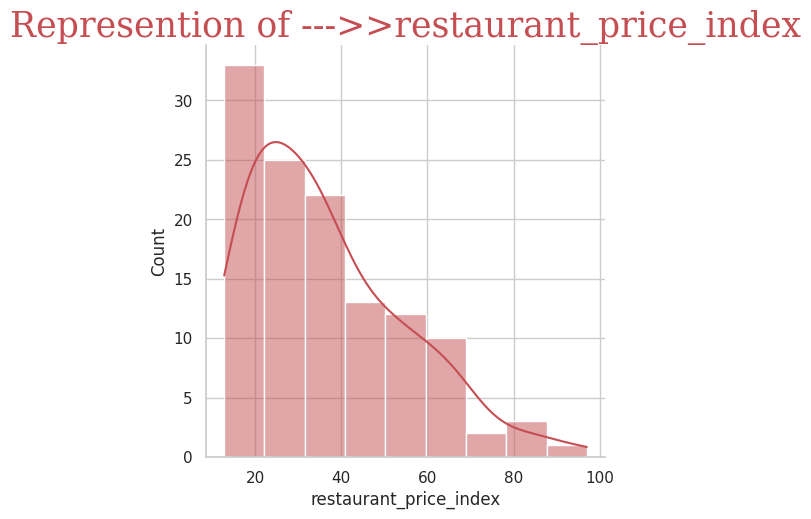

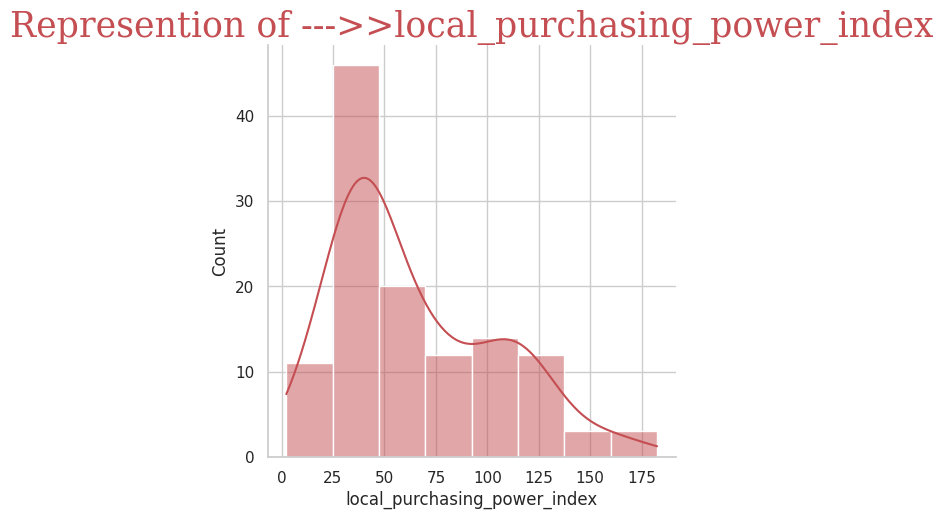

In [43]:
for col in data.select_dtypes("number").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f1)

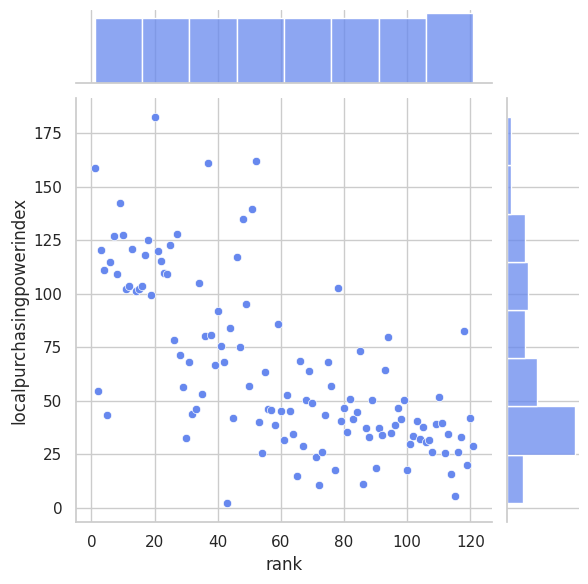

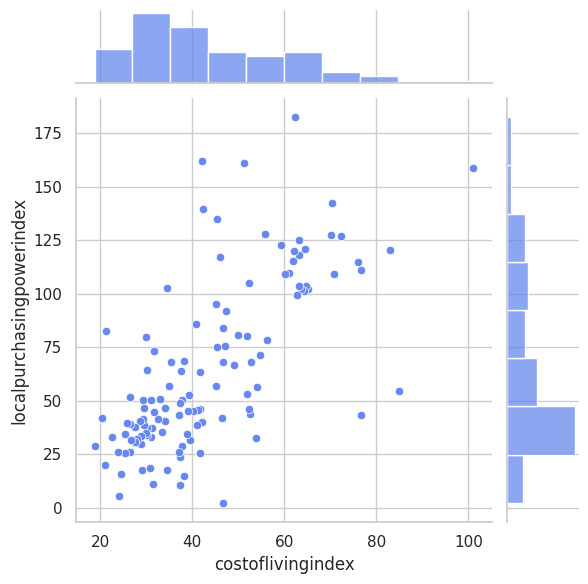

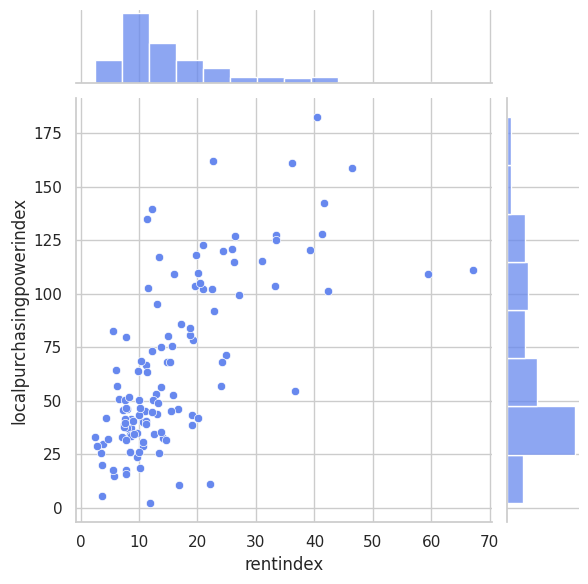

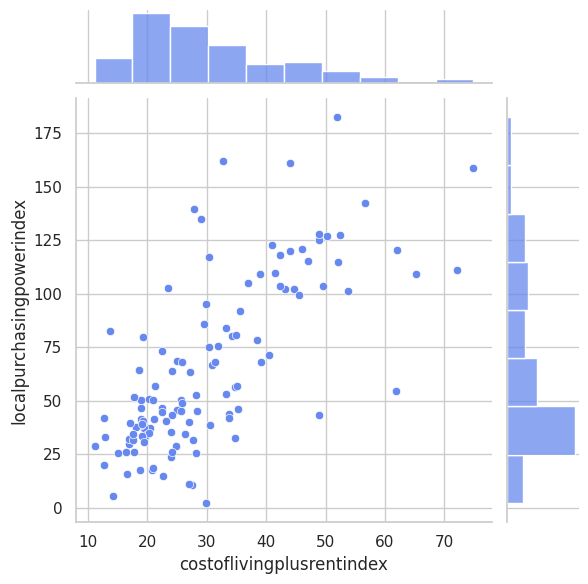

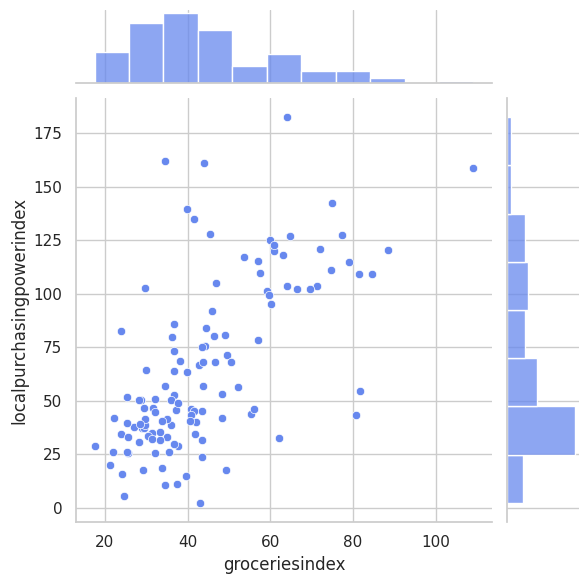

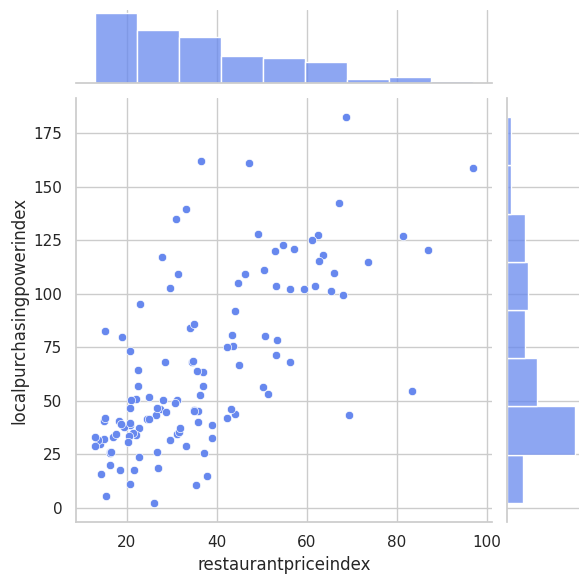

In [44]:
for col in df.select_dtypes("number"):
    if col !="localpurchasingpowerindex":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=df[col],y=df["localpurchasingpowerindex"],kind="scatter")

## Data processing and Training :(convert Categorical , Labelencoder,StandardScaler)

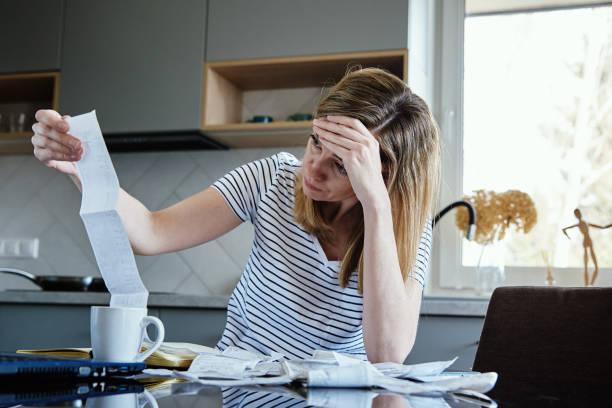

In [45]:
from IPython.display import display ,Image
img6=Image("cost6.jpg")
display(img6)

In [46]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

rank  country  cost_of_living_index  rent_index  \
0       0      103                   106          96   
1       1        7                   105          90   
2       2       45                   104          91   
3       3       95                   103          98   
4       4       10                   102          65   
..    ...      ...                   ...         ...   
116   116        9                     4           0   
117   117       46                     3           7   
118   118       32                     2           3   
119   119       63                     1           5   
120   120       81                     0           1   

     cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                               103              103                     111   
1                                99              100                     109   
2                               100              102                     110   
3                               102               94                      84   
4                                91               98                     106   
..                              ...              ...                     ...   
116                               2               10                       0   
117                               3                4                       7   
118                               1                1                      10   
119                               1                3                       8   
120                               0                0                       1   

     local_purchasing_power_index  
0                             113  
1                              63  
2                             103  
3                              97  
4                              45  
..                            ...  
116                            23  
117                            82  
118                             9  
119                            42  
120                            16  

[121 rows x 8 columns]

In [47]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

rank   country  cost_of_living_index  rent_index  \
0   -1.717795  1.231086              1.802071    1.813927   
1   -1.689165 -1.517386              1.769227    1.597009   
2   -1.660535 -0.429449              1.736383    1.633162   
3   -1.631905  1.002047              1.703539    1.886233   
4   -1.603275 -1.431496              1.670695    0.693183   
..        ...       ...                   ...         ...   
116  1.603275 -1.460126             -1.548006   -1.656766   
117  1.631905 -0.400819             -1.580850   -1.403695   
118  1.660535 -0.801638             -1.613693   -1.548307   
119  1.689165  0.085890             -1.646537   -1.476001   
120  1.717795  0.601228             -1.679381   -1.620613   

     cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          1.762849         1.807867                1.775719   
1                          1.629907         1.705630                1.713095   
2                          1.663143         1.773788                1.744407   
3                          1.729614         1.501158                0.930299   
4                          1.364024         1.637473                1.619160   
..                              ...              ...                     ...   
116                       -1.593925        -1.361463               -1.699898   
117                       -1.560690        -1.565936               -1.480715   
118                       -1.627161        -1.668172               -1.386779   
119                       -1.627161        -1.600014               -1.449403   
120                       -1.660396        -1.702251               -1.668586   

     local_purchasing_power_index  
0                        1.641015  
1                        0.157210  
2                        1.344254  
3                        1.166197  
4                       -0.376960  
..                            ...  
116                     -1.029834  
117                      0.721056  
118                     -1.445299  
119                     -0.465988  
120                     -1.237567  

[121 rows x 8 columns]

## Explantory on Dataset: (correlations , outliers ,Anova ,heatmap) :

In [48]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [49]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)

In [50]:
transform=Var_Selector(data)
transform.fit_transform(data)

rank  country  cost_of_living_index  rent_index  \
0       0      103                   106          96   
1       1        7                   105          90   
2       2       45                   104          91   
3       3       95                   103          98   
4       4       10                   102          65   
..    ...      ...                   ...         ...   
116   116        9                     4           0   
117   117       46                     3           7   
118   118       32                     2           3   
119   119       63                     1           5   
120   120       81                     0           1   

     cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                               103              103                     111   
1                                99              100                     109   
2                               100              102                     110   
3                               102               94                      84   
4                                91               98                     106   
..                              ...              ...                     ...   
116                               2               10                       0   
117                               3                4                       7   
118                               1                1                      10   
119                               1                3                       8   
120                               0                0                       1   

     local_purchasing_power_index  
0                             113  
1                              63  
2                             103  
3                              97  
4                              45  
..                            ...  
116                            23  
117                            82  
118                             9  
119                            42  
120                            16  

[121 rows x 8 columns]

In [51]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  0

Number of duplicates of cleaning it ----->>>  0


In [52]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()
corr

rank   country  cost_of_living_index  \
rank                            1.000000  0.036330             -0.999216   
country                         0.036330  1.000000             -0.037993   
cost_of_living_index           -0.999216 -0.037993              1.000000   
rent_index                     -0.871280  0.010017              0.873674   
cost_of_living_plus_rent_index -0.983674 -0.011269              0.983618   
groceries_index                -0.951628 -0.016530              0.951683   
restaurant_price_index         -0.939493 -0.087756              0.939649   
local_purchasing_power_index   -0.705434  0.054516              0.708162   

                                rent_index  cost_of_living_plus_rent_index  \
rank                             -0.871280                       -0.983674   
country                           0.010017                       -0.011269   
cost_of_living_index              0.873674                        0.983618   
rent_index                        1.000000                        0.941131   
cost_of_living_plus_rent_index    0.941131                        1.000000   
groceries_index                   0.816932                        0.932511   
restaurant_price_index            0.864096                        0.939335   
local_purchasing_power_index      0.690526                        0.719887   

                                groceries_index  restaurant_price_index  \
rank                                  -0.951628               -0.939493   
country                               -0.016530               -0.087756   
cost_of_living_index                   0.951683                0.939649   
rent_index                             0.816932                0.864096   
cost_of_living_plus_rent_index         0.932511                0.939335   
groceries_index                        1.000000                0.840762   
restaurant_price_index                 0.840762                1.000000   
local_purchasing_power_index           0.644492                0.680710   

                                local_purchasing_power_index  
rank                                               -0.705434  
country                                             0.054516  
cost_of_living_index                                0.708162  
rent_index                                          0.690526  
cost_of_living_plus_rent_index                      0.719887  
groceries_index                                     0.644492  
restaurant_price_index                              0.680710  
local_purchasing_power_index                        1.000000

In [53]:
# Calculate Spearman Correlation:
sperman=data.select_dtypes("number").corr(method="spearman")
sperman

rank   country  cost_of_living_index  \
rank                            1.000000  0.036330             -0.999973   
country                         0.036330  1.000000             -0.037222   
cost_of_living_index           -0.999973 -0.037222              1.000000   
rent_index                     -0.871966  0.008214              0.872376   
cost_of_living_plus_rent_index -0.983533 -0.011588              0.983672   
groceries_index                -0.951507 -0.018291              0.951401   
restaurant_price_index         -0.939433 -0.088377              0.939687   
local_purchasing_power_index   -0.705024  0.053645              0.705309   

                                rent_index  cost_of_living_plus_rent_index  \
rank                             -0.871966                       -0.983533   
country                           0.008214                       -0.011588   
cost_of_living_index              0.872376                        0.983672   
rent_index                        1.000000                        0.940155   
cost_of_living_plus_rent_index    0.940155                        1.000000   
groceries_index                   0.815985                        0.931566   
restaurant_price_index            0.861471                        0.937696   
local_purchasing_power_index      0.681106                        0.715763   

                                groceries_index  restaurant_price_index  \
rank                                  -0.951507               -0.939433   
country                               -0.018291               -0.088377   
cost_of_living_index                   0.951401                0.939687   
rent_index                             0.815985                0.861471   
cost_of_living_plus_rent_index         0.931566                0.937696   
groceries_index                        1.000000                0.837876   
restaurant_price_index                 0.837876                1.000000   
local_purchasing_power_index           0.641844                0.678728   

                                local_purchasing_power_index  
rank                                               -0.705024  
country                                             0.053645  
cost_of_living_index                                0.705309  
rent_index                                          0.681106  
cost_of_living_plus_rent_index                      0.715763  
groceries_index                                     0.641844  
restaurant_price_index                              0.678728  
local_purchasing_power_index                        1.000000

In [54]:
# Calculate pearson Correlation:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson


rank   country  cost_of_living_index  \
rank                            1.000000  0.036330             -0.999216   
country                         0.036330  1.000000             -0.037993   
cost_of_living_index           -0.999216 -0.037993              1.000000   
rent_index                     -0.871280  0.010017              0.873674   
cost_of_living_plus_rent_index -0.983674 -0.011269              0.983618   
groceries_index                -0.951628 -0.016530              0.951683   
restaurant_price_index         -0.939493 -0.087756              0.939649   
local_purchasing_power_index   -0.705434  0.054516              0.708162   

                                rent_index  cost_of_living_plus_rent_index  \
rank                             -0.871280                       -0.983674   
country                           0.010017                       -0.011269   
cost_of_living_index              0.873674                        0.983618   
rent_index                        1.000000                        0.941131   
cost_of_living_plus_rent_index    0.941131                        1.000000   
groceries_index                   0.816932                        0.932511   
restaurant_price_index            0.864096                        0.939335   
local_purchasing_power_index      0.690526                        0.719887   

                                groceries_index  restaurant_price_index  \
rank                                  -0.951628               -0.939493   
country                               -0.016530               -0.087756   
cost_of_living_index                   0.951683                0.939649   
rent_index                             0.816932                0.864096   
cost_of_living_plus_rent_index         0.932511                0.939335   
groceries_index                        1.000000                0.840762   
restaurant_price_index                 0.840762                1.000000   
local_purchasing_power_index           0.644492                0.680710   

                                local_purchasing_power_index  
rank                                               -0.705434  
country                                             0.054516  
cost_of_living_index                                0.708162  
rent_index                                          0.690526  
cost_of_living_plus_rent_index                      0.719887  
groceries_index                                     0.644492  
restaurant_price_index                              0.680710  
local_purchasing_power_index                        1.000000

In [55]:
# Calculate Kendall Correlation:
kendall=data.select_dtypes("number").corr(method="kendall")
kendall


rank   country  cost_of_living_index  \
rank                            1.000000  0.018733             -0.998966   
country                         0.018733  1.000000             -0.019166   
cost_of_living_index           -0.998966 -0.019166              1.000000   
rent_index                     -0.687001  0.004968              0.688541   
cost_of_living_plus_rent_index -0.896077 -0.001517              0.897832   
groceries_index                -0.823530 -0.007586              0.823968   
restaurant_price_index         -0.794211 -0.057615              0.795171   
local_purchasing_power_index   -0.508129  0.038303              0.509068   

                                rent_index  cost_of_living_plus_rent_index  \
rank                             -0.687001                       -0.896077   
country                           0.004968                       -0.001517   
cost_of_living_index              0.688541                        0.897832   
rent_index                        1.000000                        0.792925   
cost_of_living_plus_rent_index    0.792925                        1.000000   
groceries_index                   0.621710                        0.785527   
restaurant_price_index            0.680846                        0.786281   
local_purchasing_power_index      0.496964                        0.523833   

                                groceries_index  restaurant_price_index  \
rank                                  -0.823530               -0.794211   
country                               -0.007586               -0.057615   
cost_of_living_index                   0.823968                0.795171   
rent_index                             0.621710                0.680846   
cost_of_living_plus_rent_index         0.785527                0.786281   
groceries_index                        1.000000                0.660962   
restaurant_price_index                 0.660962                1.000000   
local_purchasing_power_index           0.460095                0.493313   

                                local_purchasing_power_index  
rank                                               -0.508129  
country                                             0.038303  
cost_of_living_index                                0.509068  
rent_index                                          0.496964  
cost_of_living_plus_rent_index                      0.523833  
groceries_index                                     0.460095  
restaurant_price_index                              0.493313  
local_purchasing_power_index                        1.000000

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

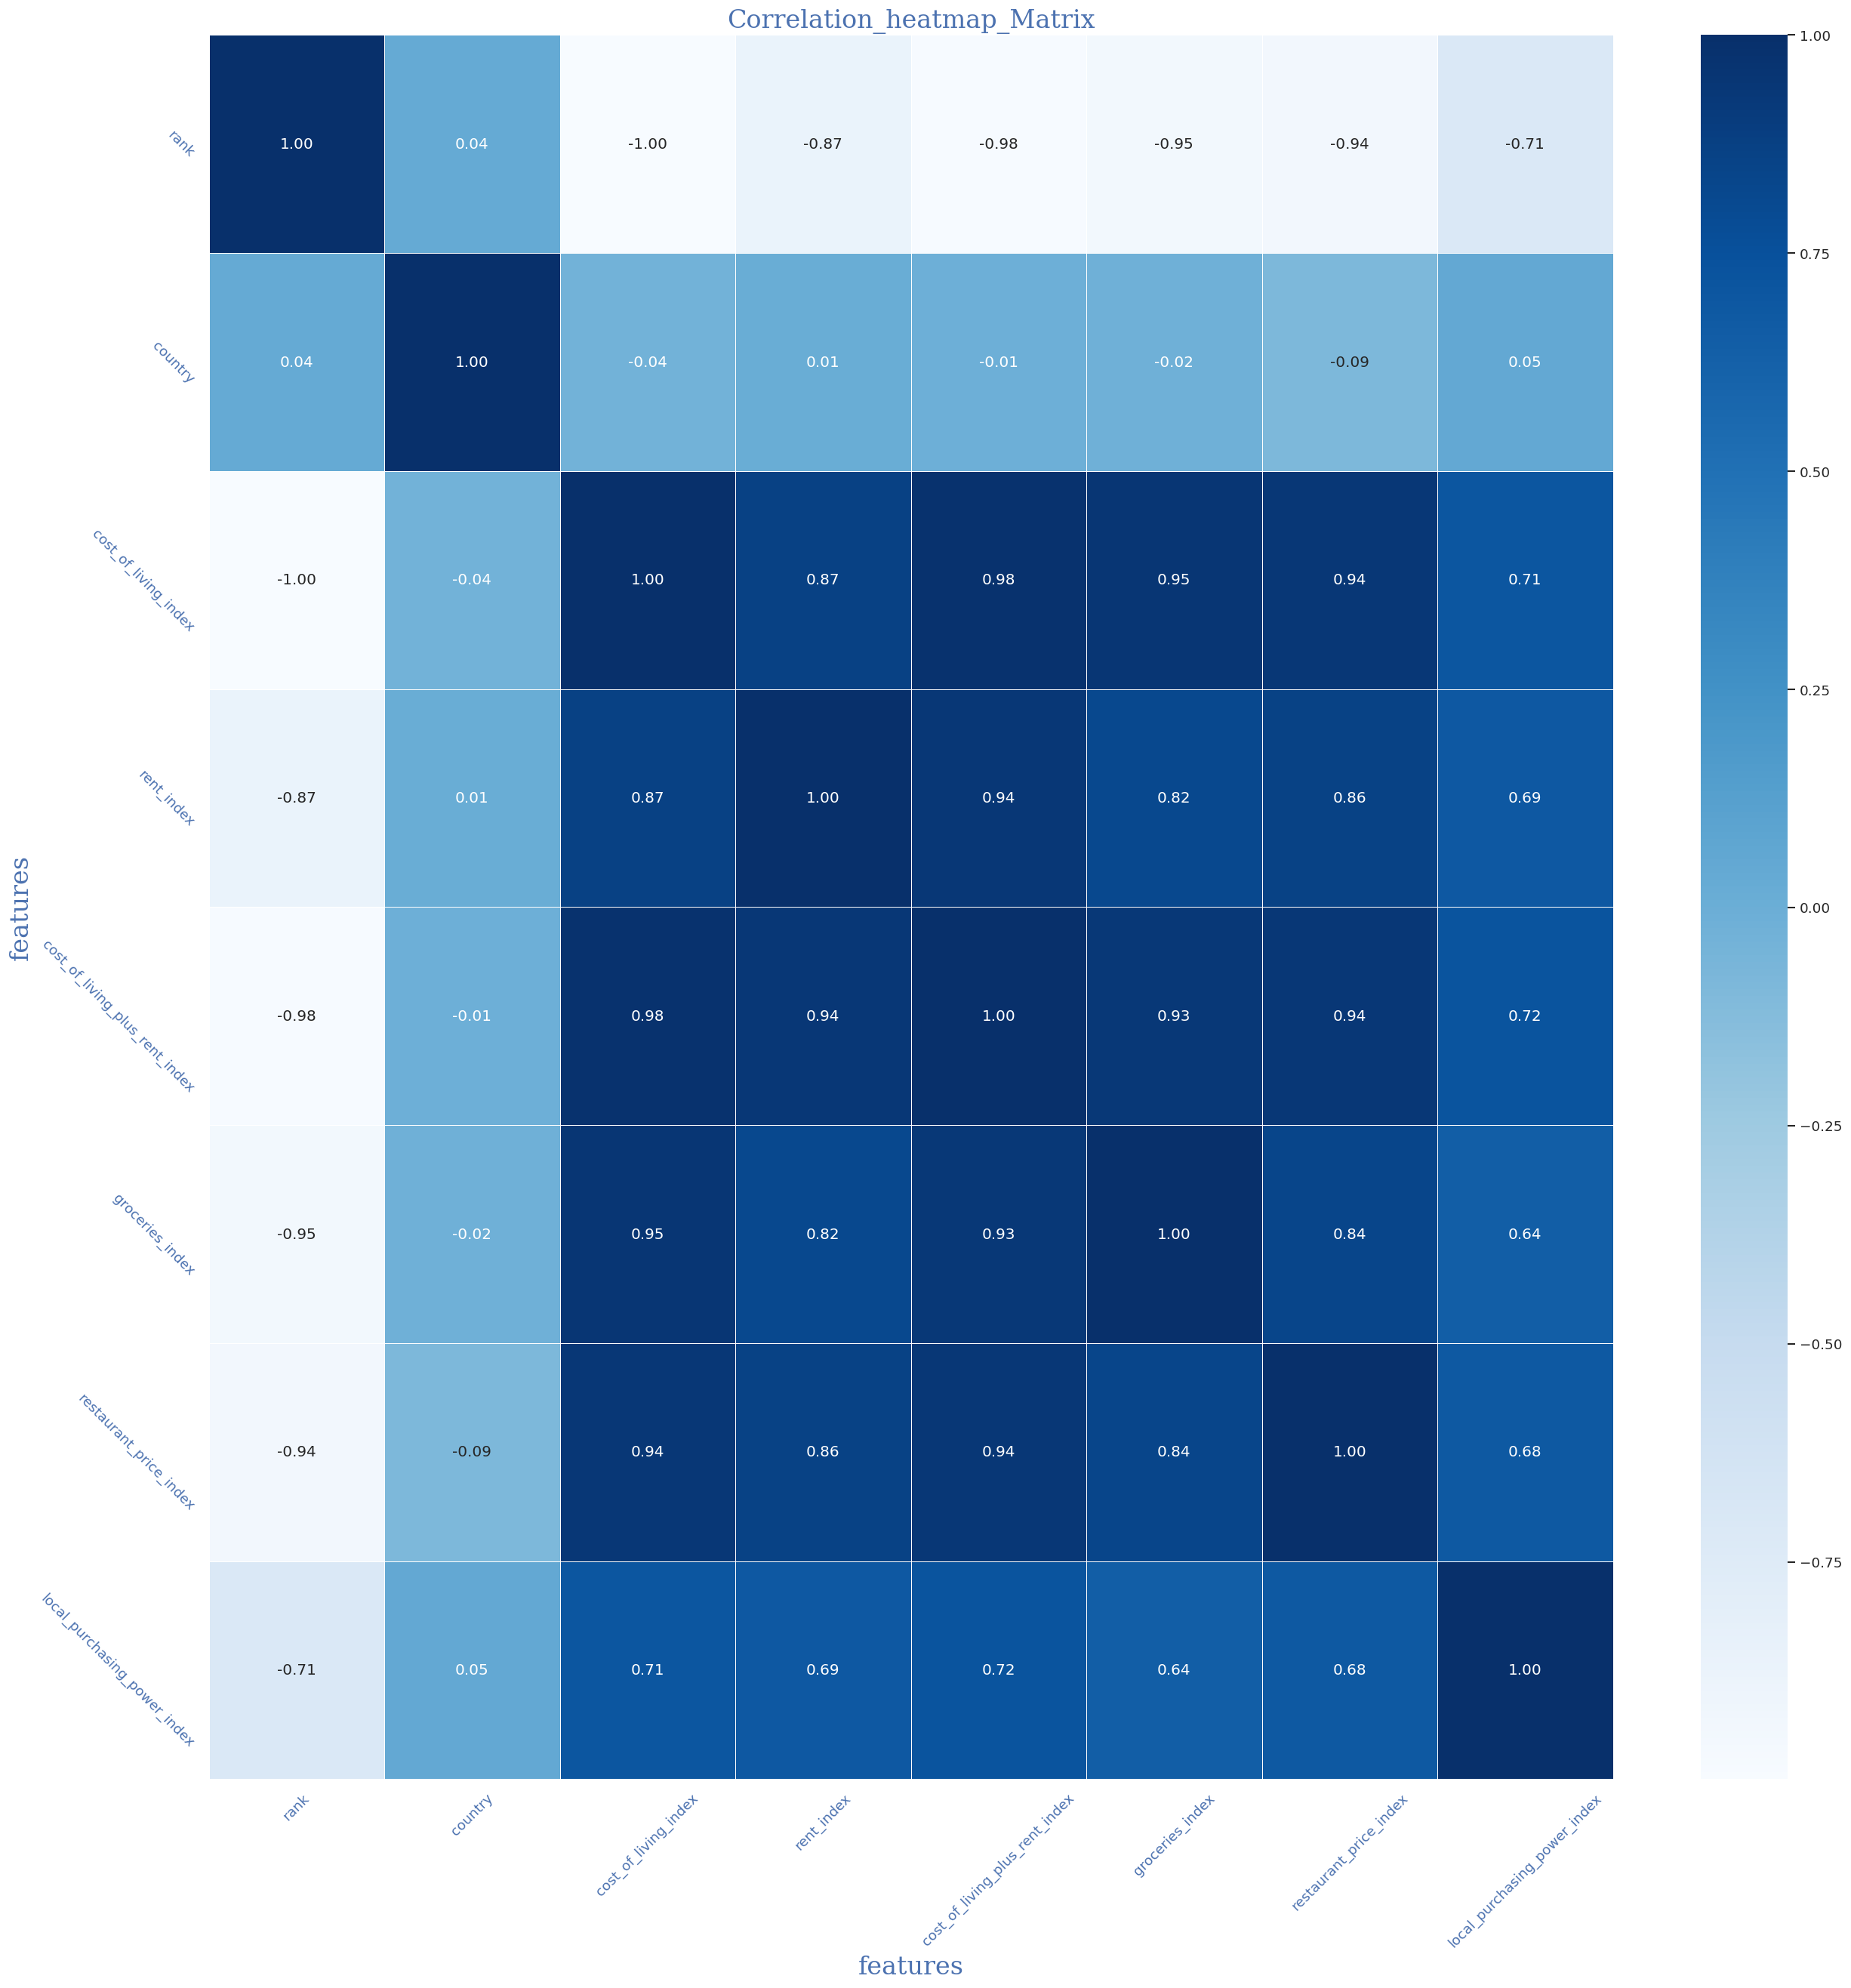

In [56]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)

In [57]:
# No outliers found :
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in rank feature

Q1 of rank --->>> 30.0 

 Q3 of rank ---->>> 90.0 

 iqr--->>60.0

 low_limit--->>>-60.0 

  upper_limit--->>> 180.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in country feature

Q1 of country --->>> 30.0 

 Q3 of country ---->>> 90.0 

 iqr--->>60.0

 low_limit--->>>-60.0 

  upper_limit--->>> 180.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in cost_of_living_index feature

Q1 of cost_of_living_index --->>> 24.0 

 Q3 of cost_of_living_index ---->>> 76.0 

 iqr--->>52.0

 low_limit--->>>-54.0 

  upper_limit--->>> 154.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in rent_index feature

Q1 of rent_index --->>> 23.0 

 Q3 of rent_index ---->>> 69.0 

 iqr--->>46.0

 low_limit--->>>-46.0 

  upper_limit--->>> 138.0 

 outlier---->>> [] 

 Number of outliers --

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


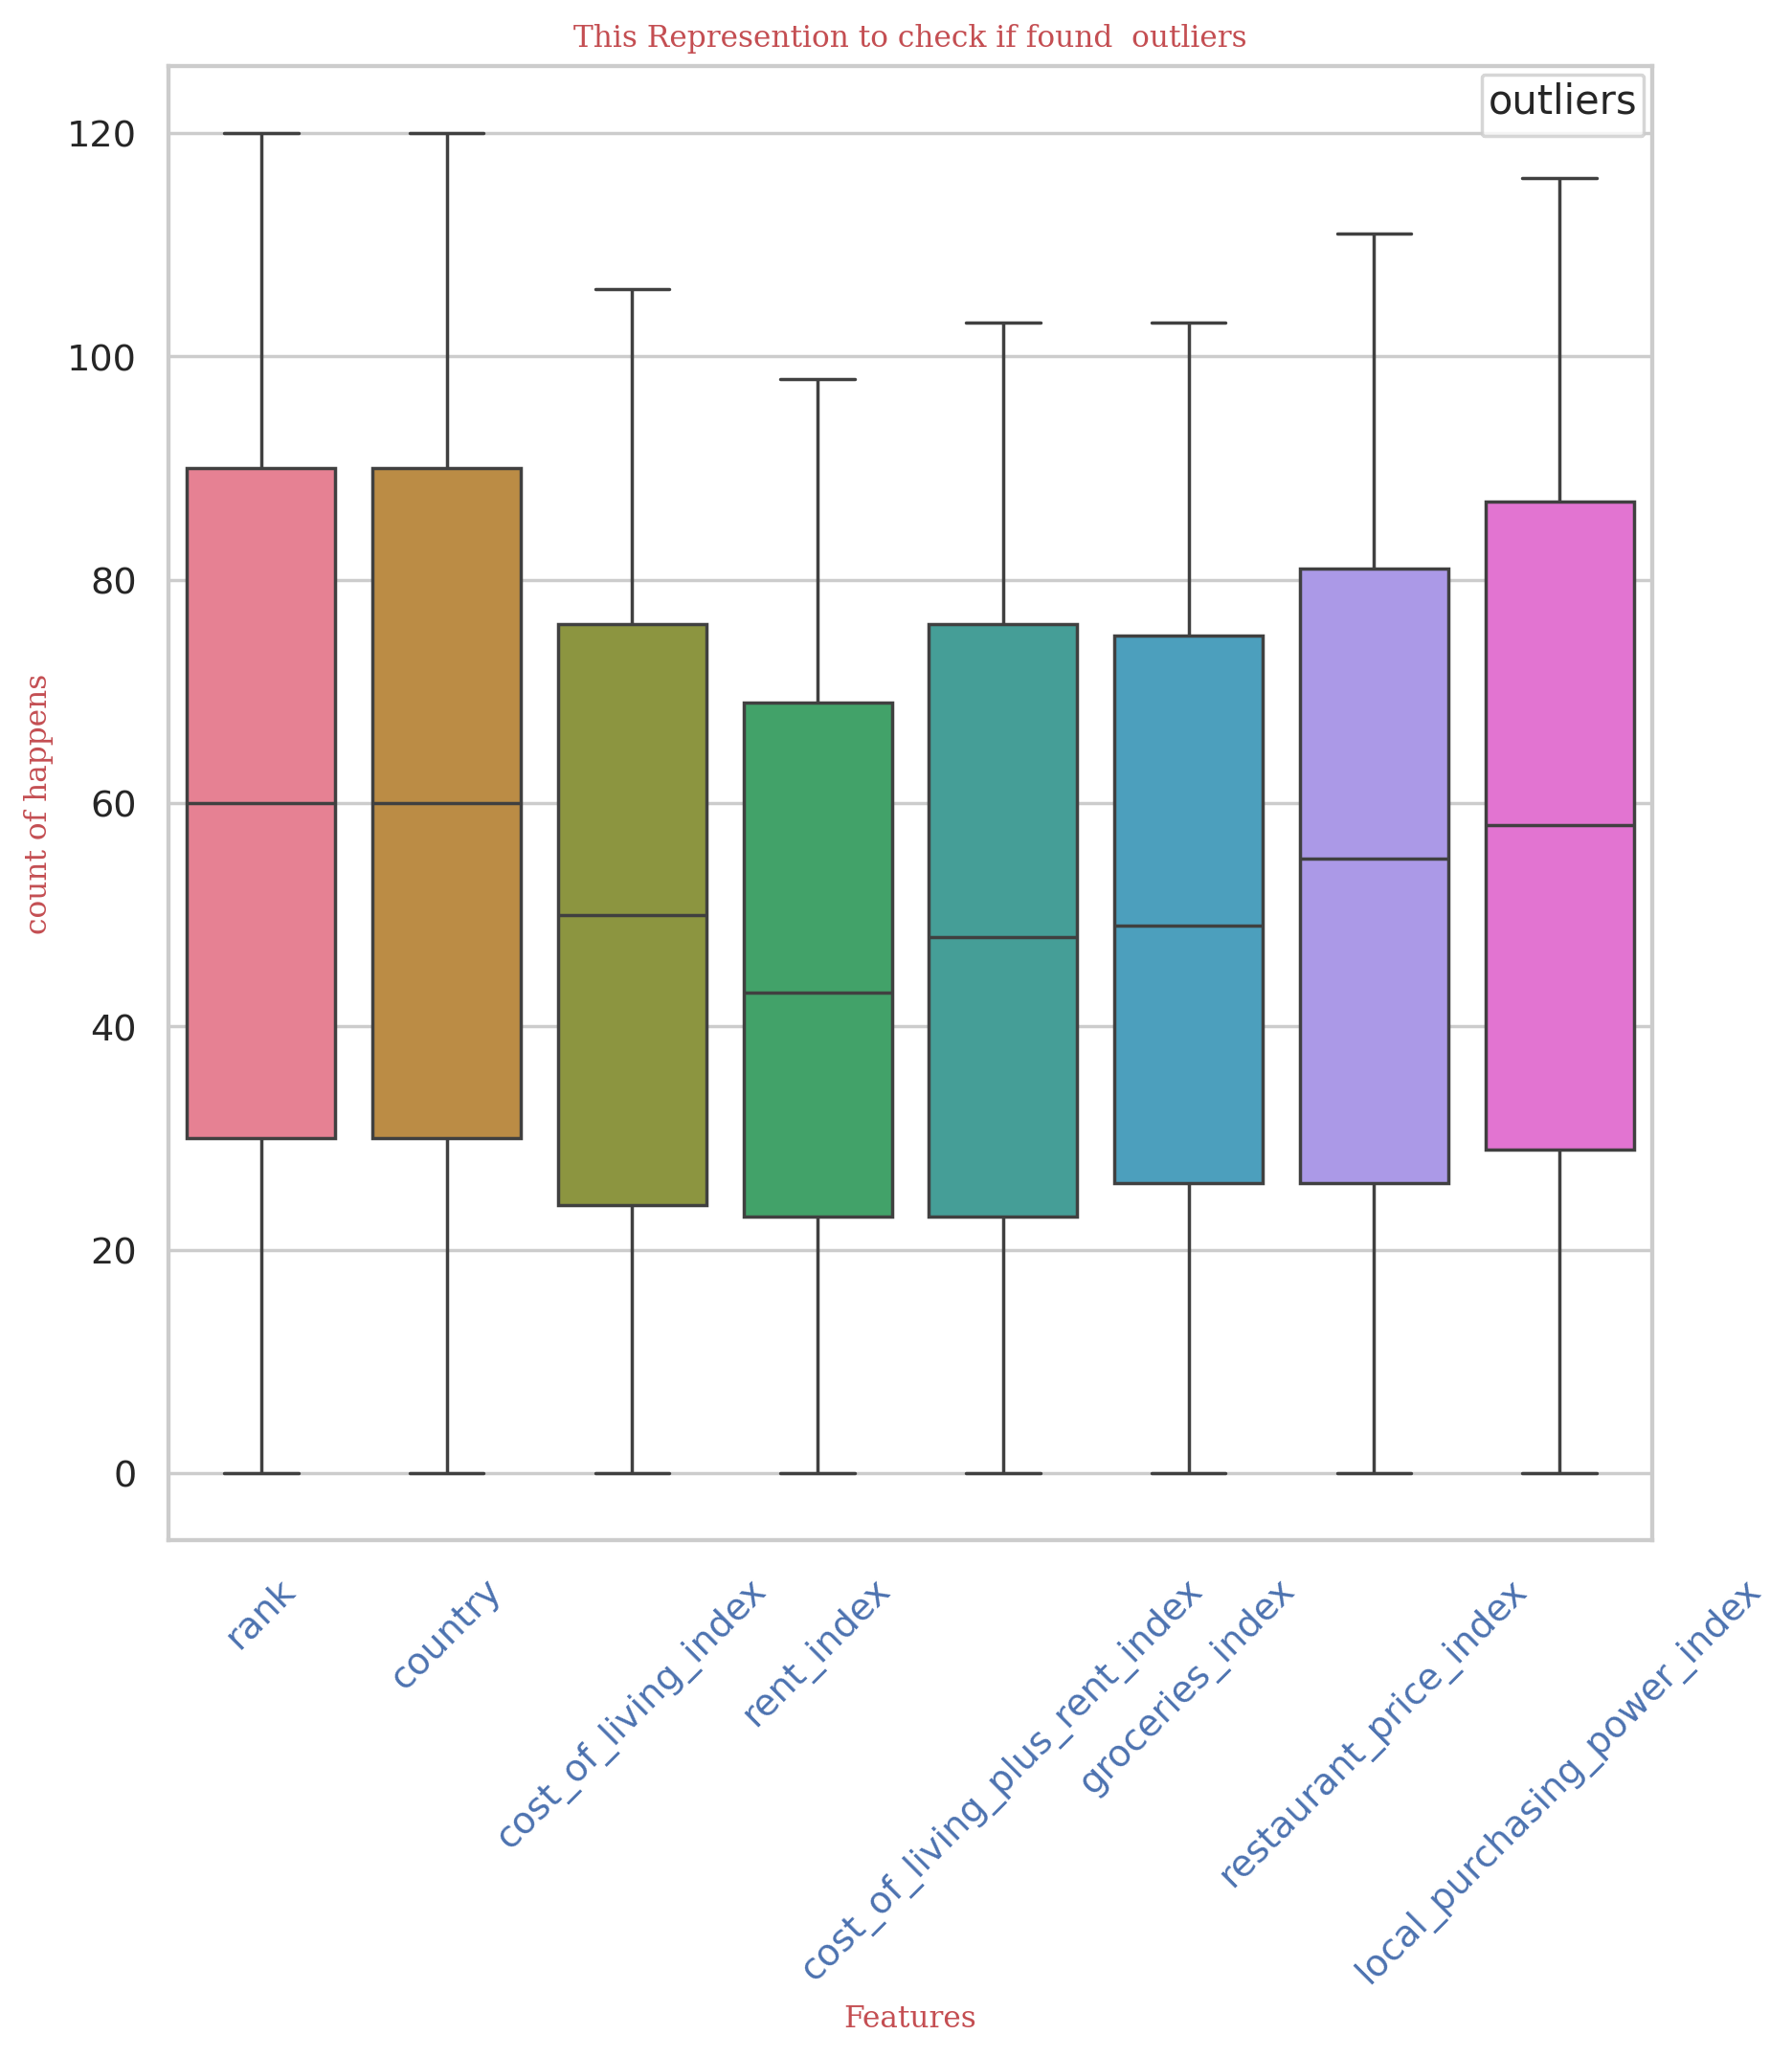

In [58]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(8,8),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

## End Project 

* Here is the end of project .

* if you find my work useful , upvote me and if you have any question Leave me in comments .

* Devloper : AbdalRhman Gameel Ahmed Hebishy .

* Another Works : https://www.kaggle.com/abdalrhamnhebishy/code